<h3> DV Lab Assignment 4 </h3>
<h4> Mukul Shingwani </h4>
<h4> B20AI023 </h4>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

For screen display, bright and vibrant colors are appropriate. Some popular colors for screen display are:
<br>
RGB

For presentation, it is recommended to use colors that are easy on the eyes, and do not cause any strain to the audience. Some popular colors for presentations are:
<br>
Light Blue (#87CEFA),
Light Green (#98FB98),
Light Grey (#D3D3D3),
Light Pink (#FFB6C1),
Light Purple (#9370DB),
Light Yellow (#FFFFE0)

for printing CMYK color scheme is used

### importing the datasets

In [48]:
df1 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/Road_Transport_BRS_2017-18_Annexure7_9c.csv')

In [49]:
df1.head()

State or Union Territory Type of System  No. of Colleges - Govt  \
0          Andhra Pradesh        Ayurveda                       1   
1                  Assam         Ayurveda                       1   
2                   Bihar        Ayurveda                       2   
3           Chhattisgarh         Ayurveda                       2   
4                  Delhi         Ayurveda                       3   

   Admission Capacity - Govt  Permitted Seats - Govt  \
0                        100                     100   
1                         93                      93   
2                        211                     211   
3                        216                     216   
4                        359                     359   

   No. of Colleges - Non-Govt  Admission Capacity - Non-Govt  \
0                           2                            176   
1                           0                              0   
2                           6                            280   
3                           4                            280   
4                           0                              0   

   Permitted Seats - Non-Govt  
0                         118  
1                           0  
2                         153  
3                         250  
4                           0

In [50]:
df2.head()

Particulars Frequency    Unit   9-2013  \
0                                 Foodgrains   Monthly  Ton mn    59.24   
1                            Foodgrains Rice   Monthly  Ton mn    19.03   
2  Foodgrains Unmilled Paddy in term of Rice   Monthly  Ton mn     4.11   
3                           Foodgrains Wheat   Monthly  Ton mn    36.10   

    10-2013   11-2013   12-2013   1-2014   2-2014   3-2014   4-2014   5-2014  \
0     62.68     59.69     58.37    55.91    52.48    48.39    63.06    69.85   
1     16.85     14.22     14.70    16.94    18.88    20.28    20.42    20.65   
2     11.73     14.41     15.62    14.77    12.76    10.28     8.24     7.61   
3     34.10     31.07     28.05    24.20    20.84    17.83    34.40    41.59   

    6-2014  
0    65.34  
1    21.24  
2     4.30  
3    39.80

In [51]:
df3.head()

Name of the States  National Highways  State Highways  District Roads  \
0     Andhra Pradesh              10207           15753           58083   
1  Arunachal Pradesh               2537           13500            8731   
2              Assam               3909            2530            6093   
3              Bihar               4877            4006           11145   
4       Chhattisgarh               3592            4176           11965   

   Rural Roads  Urban Roads  Project Roads  Total road Length  \
0       217892        34878           9447             346260   
1        20807           56           4924              50555   
2       303672         5603          21803             343609   
3       258800         9184           2559             290571   
4        54308        12765          15772             102578   

   Total Population  Road length per '000 pop  \
0             84581                      4.09   
1              1384                     36.54   
2             31206                     11.01   
3            104099                      2.79   
4             25545                      4.02   

   Road length per '000  Population - National Highways  \
0                                               0.12      
1                                               1.83      
2                                               0.13      
3                                               0.05      
4                                               0.14      

   Road length per '000  Population - State Highways  \
0                                               0.19   
1                                               9.76   
2                                               0.08   
3                                               0.04   
4                                               0.16   

   Road length per '000  Population - District Roads  \
0                                               0.69   
1                                               6.31   
2                                               0.20   
3                                               0.11   
4                                               0.47   

   Road length per '000  Population - Rural Roads  \
0                                            2.58   
1                                           15.04   
2                                            9.73   
3                                            2.49   
4                                            2.13   

   Road length per '000  Population - Urban roads  \
0                                            0.41   
1                                            0.04   
2                                            0.18   
3                                            0.09   
4                                            0.50   

   Road length per '000  Population - Project Roads  
0                                              0.11  
1                                              3.56  
2                                              0.70  
3                                              0.02  
4                                              0.62

In [52]:
df1.columns

Index(['State or Union Territory', 'Type of System', 'No. of Colleges - Govt',
       'Admission Capacity - Govt', 'Permitted Seats - Govt',
       'No. of Colleges - Non-Govt', 'Admission Capacity - Non-Govt',
       'Permitted Seats - Non-Govt'],
      dtype='object')

In [53]:
df2.columns

Index(['Particulars', 'Frequency', 'Unit', ' 9-2013', ' 10-2013', ' 11-2013',
       ' 12-2013', ' 1-2014', ' 2-2014', ' 3-2014', ' 4-2014', ' 5-2014',
       ' 6-2014'],
      dtype='object')

In [54]:
df2['Particulars'].unique()

array(['Foodgrains', 'Foodgrains Rice',
       'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Wheat'],
      dtype=object)

### Part 1

In [55]:
# monthly_stocks = df[[' 9-2013', ' 10-2013', ' 11-2013', ' 12-2013', ' 1-2014', ' 2-2014', ' 3-2014', ' 4-2014', ' 5-2014', ' 6-2014']]

In [56]:
# Load the dataset
df = df2.copy()

# Filter for the four types of food grains
food_grains = df.loc[df['Particulars'].isin(df['Particulars'].unique())]

# Calculate monthly changes for each food grain type
food_grains_changes = {
    name: group.iloc[:, 3:].diff(axis=1).iloc[:, 1:]
    for name, group in food_grains.groupby('Particulars')
}


#### for screen display

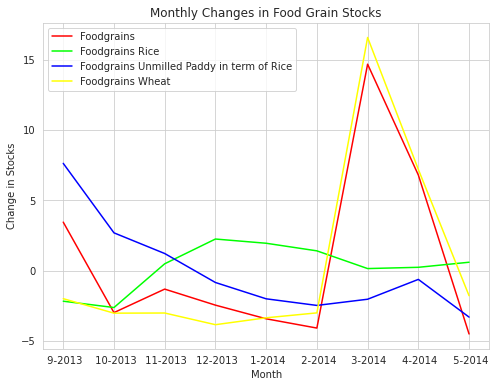

In [57]:
# Define custom palette
custom_palette = ['#FF0000','#00FF00','#0000FF','#FFFF00']

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 6))

for name, changes in food_grains_changes.items():
    ax.plot(changes.T, label=name)

# Add chart labels and legend
ax.set(title='Monthly Changes in Food Grain Stocks',
       xlabel='Month',
       ylabel='Change in Stocks',
       xticks=range(0, 9),
       xticklabels=food_grains.columns[3:])

ax.legend()

# Display the chart
plt.show()


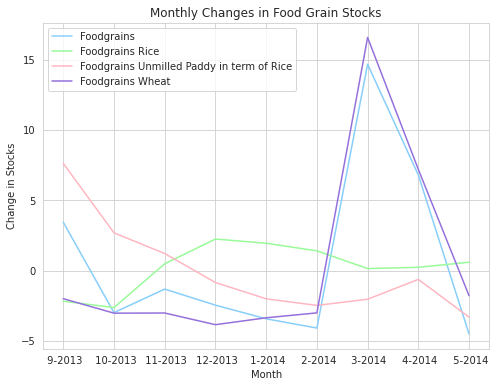

In [58]:
# Define custom palette
custom_palette = ['#87CEFA','#98FB98','#FFB6C1','#9370DB']

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 6))

for name, changes in food_grains_changes.items():
    ax.plot(changes.T, label=name)

# Add chart labels and legend
ax.set(title='Monthly Changes in Food Grain Stocks',
       xlabel='Month',
       ylabel='Change in Stocks',
       xticks=range(0, 9),
       xticklabels=food_grains.columns[3:])

ax.legend()

# Display the chart
plt.show()


#### for printing

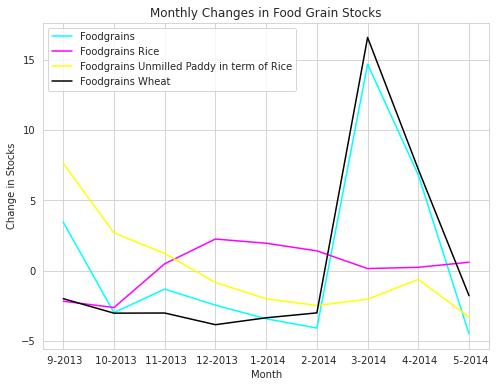

In [59]:
# Define custom palette
custom_palette = ["#00FFFF", "#FF00FF", "#FFFF00", "#000000"]

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 6))

for name, changes in food_grains_changes.items():
    ax.plot(changes.T, label=name)

# Add chart labels and legend
ax.set(title='Monthly Changes in Food Grain Stocks',
       xlabel='Month',
       ylabel='Change in Stocks',
       xticks=range(0, 9),
       xticklabels=food_grains.columns[3:])

ax.legend()

# Display the chart
plt.show()


In [60]:
df2['Particulars'].unique()

array(['Foodgrains', 'Foodgrains Rice',
       'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Wheat'],
      dtype=object)

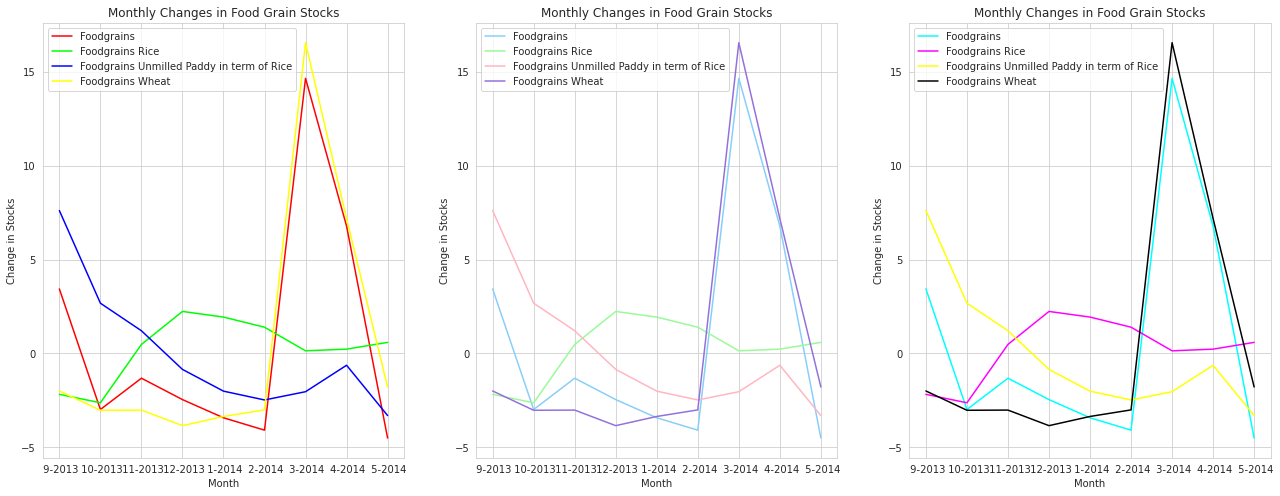

In [61]:
# Define custom palettes
custom_palettes = [    ['#FF0000', '#00FF00', '#0000FF', '#FFFF00'],
    ['#87CEFA', '#98FB98', '#FFB6C1', '#9370DB'],
    ['#00FFFF', '#FF00FF', '#FFFF00', '#000000']
]

# Set the style
sns.set_style('whitegrid')

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(22, 8))

# Create the line charts
for i, (palette, ax) in enumerate(zip(custom_palettes, axs)):
    for name, changes in food_grains_changes.items():
        color = sns.color_palette(palette)[list(food_grains_changes.keys()).index(name)]
        ax.plot(changes.T, label=name, color=color)
    ax.set(
        title='Monthly Changes in Food Grain Stocks',
        xlabel='Month',
        ylabel='Change in Stocks',
        xticks=range(0, 9),
        xticklabels=food_grains.columns[3:]
    )
    ax.legend()

plt.show()


#### using continuous scale

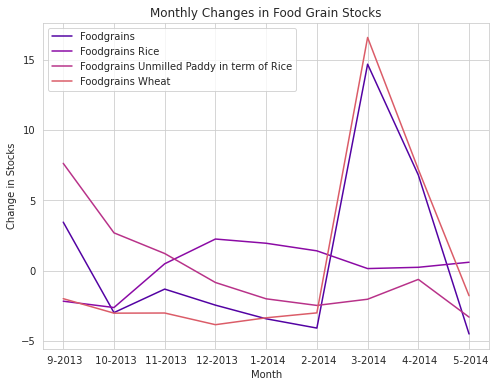

In [62]:
custom_palette = 'plasma'
# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 6))

for name, changes in food_grains_changes.items():
    ax.plot(changes.T, label=name)

# Add chart labels and legend
ax.set(title='Monthly Changes in Food Grain Stocks',
       xlabel='Month',
       ylabel='Change in Stocks',
       xticks=range(0, 9),
       xticklabels=food_grains.columns[3:])

ax.legend()

# Display the chart
plt.show()

#### one color sequential

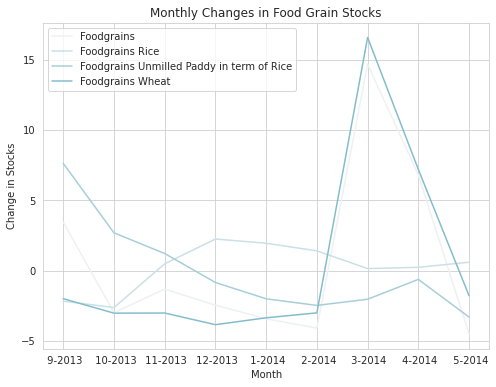

In [63]:
custom_palette = sns.light_palette("#3B9AB2")
# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 6))

for name, changes in food_grains_changes.items():
    ax.plot(changes.T, label=name)

# Add chart labels and legend
ax.set(title='Monthly Changes in Food Grain Stocks',
       xlabel='Month',
       ylabel='Change in Stocks',
       xticks=range(0, 9),
       xticklabels=food_grains.columns[3:])

ax.legend()

# Display the chart
plt.show()

#### using bipolar color scheme

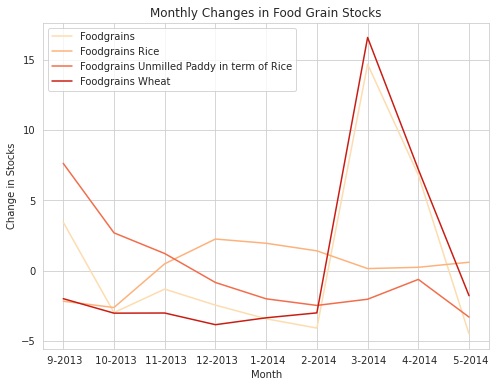

In [64]:

custom_palette = sns.color_palette("OrRd", n_colors=4)

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)

# Create the line chart
fig, ax = plt.subplots(figsize=(8, 6))

for name, changes in food_grains_changes.items():
    ax.plot(changes.T, label=name)

# Add chart labels and legend
ax.set(title='Monthly Changes in Food Grain Stocks',
       xlabel='Month',
       ylabel='Change in Stocks',
       xticks=range(0, 9),
       xticklabels=food_grains.columns[3:])

ax.legend()

# Display the chart
plt.show()


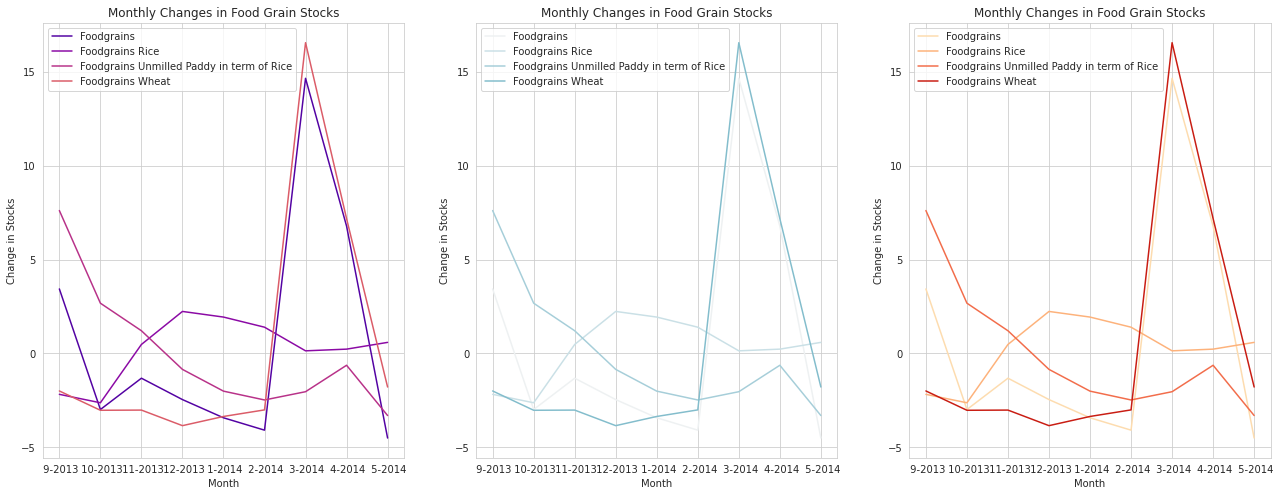

In [65]:
# Define custom palettes
custom_palettes = ['plasma',sns.light_palette("#3B9AB2"),sns.color_palette("OrRd", n_colors=4)]

# Set the style
sns.set_style('whitegrid')

# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(22, 8))

# Create the line charts
for i, (palette, ax) in enumerate(zip(custom_palettes, axs)):
    for name, changes in food_grains_changes.items():
        color = sns.color_palette(palette)[list(food_grains_changes.keys()).index(name)]
        ax.plot(changes.T, label=name, color=color)
    ax.set(
        title='Monthly Changes in Food Grain Stocks',
        xlabel='Month',
        ylabel='Change in Stocks',
        xticks=range(0, 9),
        xticklabels=food_grains.columns[3:]
    )
    ax.legend()

plt.show()


## Part 2

In [66]:
df1 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/Road_Transport_BRS_2017-18_Annexure7_9c.csv')

In [67]:
df1.columns

Index(['State or Union Territory', 'Type of System', 'No. of Colleges - Govt',
       'Admission Capacity - Govt', 'Permitted Seats - Govt',
       'No. of Colleges - Non-Govt', 'Admission Capacity - Non-Govt',
       'Permitted Seats - Non-Govt'],
      dtype='object')

In [68]:
df1.head()

State or Union Territory Type of System  No. of Colleges - Govt  \
0          Andhra Pradesh        Ayurveda                       1   
1                  Assam         Ayurveda                       1   
2                   Bihar        Ayurveda                       2   
3           Chhattisgarh         Ayurveda                       2   
4                  Delhi         Ayurveda                       3   

   Admission Capacity - Govt  Permitted Seats - Govt  \
0                        100                     100   
1                         93                      93   
2                        211                     211   
3                        216                     216   
4                        359                     359   

   No. of Colleges - Non-Govt  Admission Capacity - Non-Govt  \
0                           2                            176   
1                           0                              0   
2                           6                            280   
3                           4                            280   
4                           0                              0   

   Permitted Seats - Non-Govt  
0                         118  
1                           0  
2                         153  
3                         250  
4                           0

In [69]:
df1['Type of System'].unique()

array(['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy'],
      dtype=object)

<h2> Note: plotting for all types of systems </h2>

#### for screen display

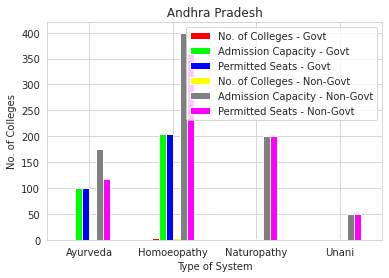

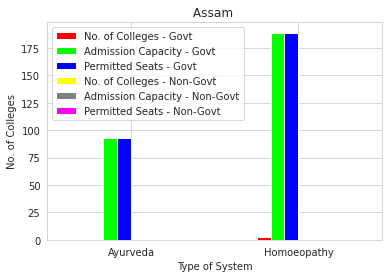

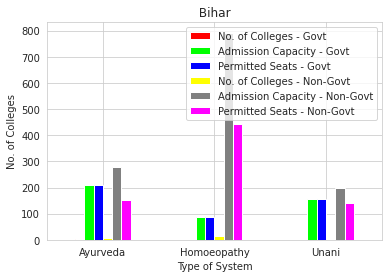

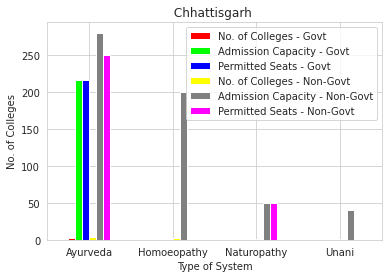

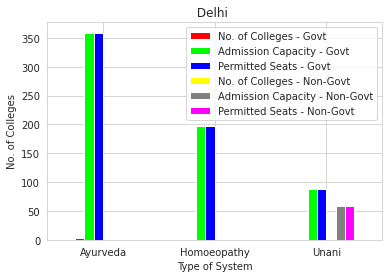

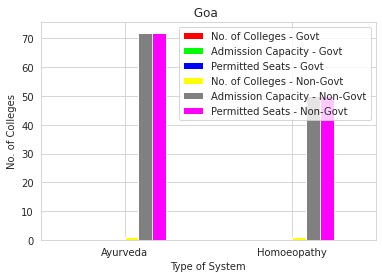

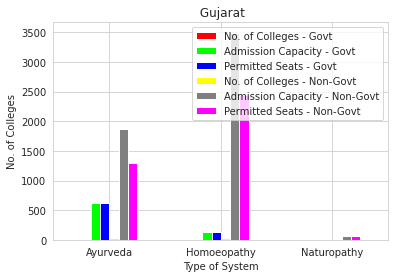

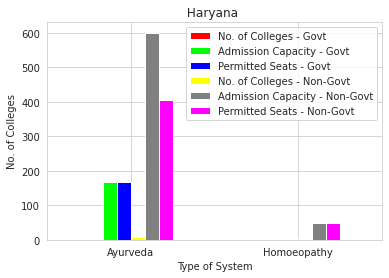

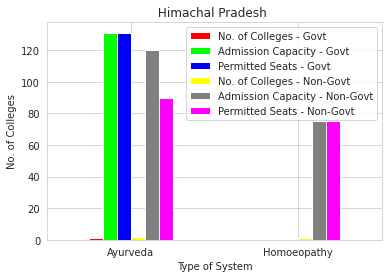

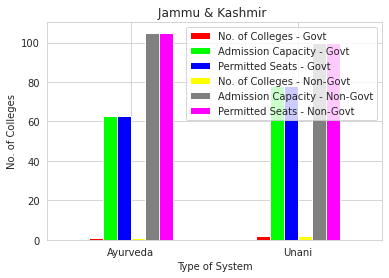

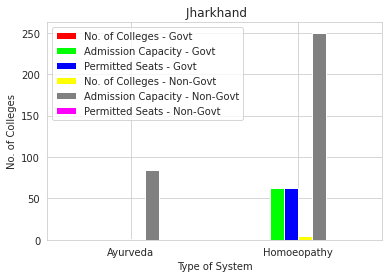

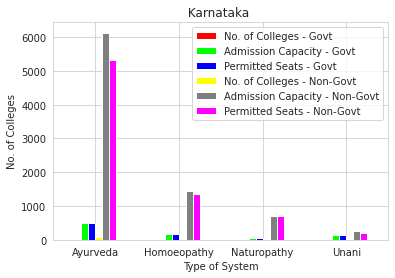

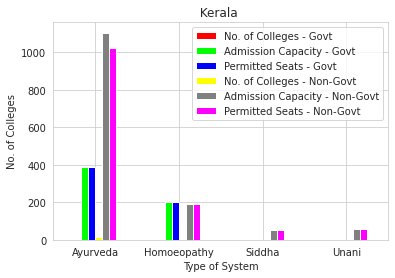

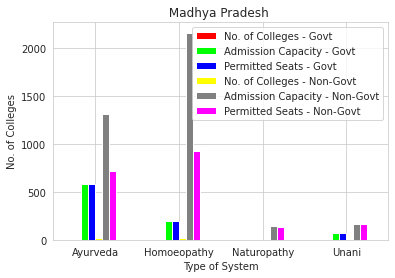

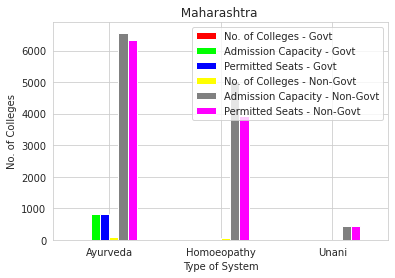

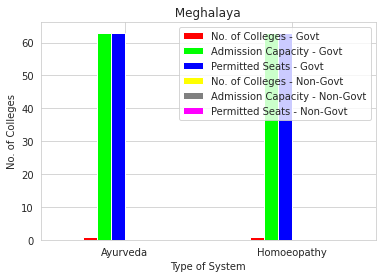

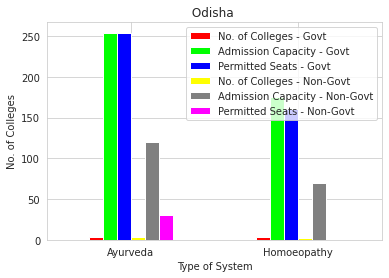

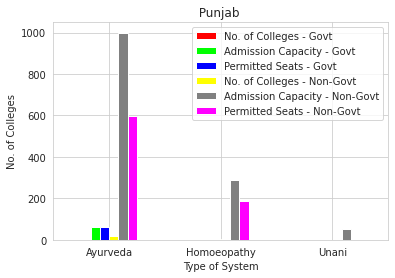

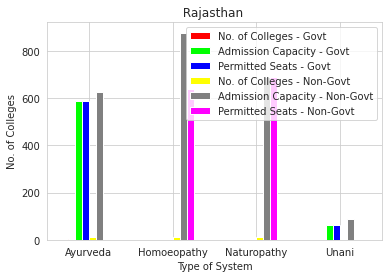

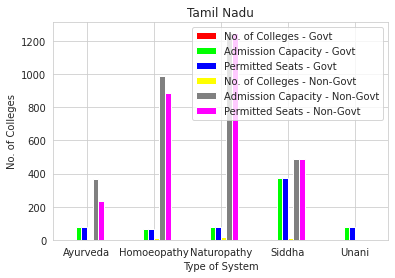

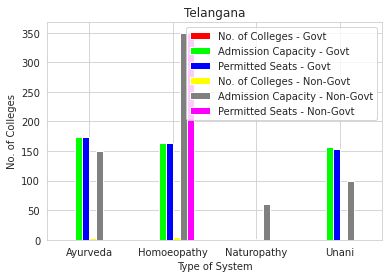

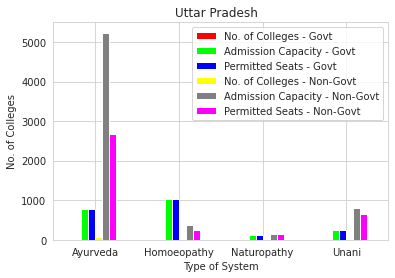

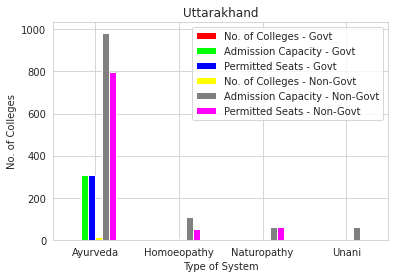

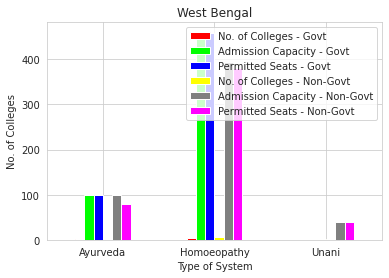

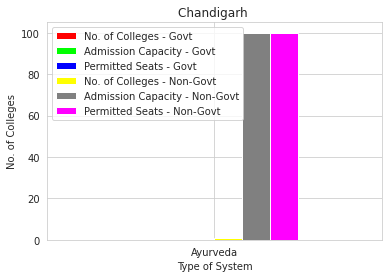

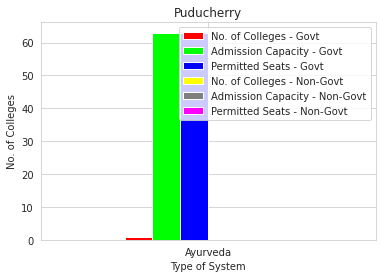

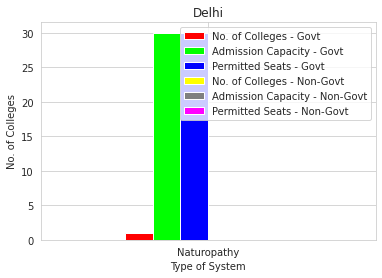

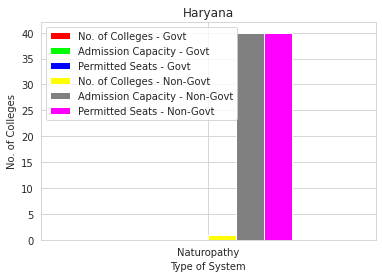

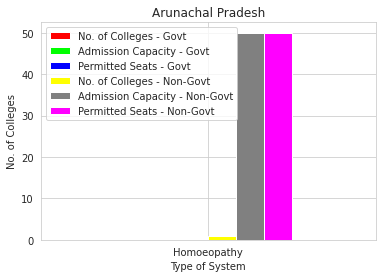

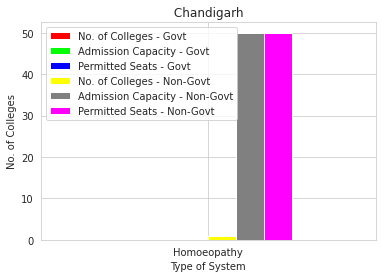

In [70]:

df = df1
# Define custom palette
custom_palette = ['#FF0000','#00FF00','#0000FF','#FFFF00','#808080','#FF00FF']

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)
# group the data by State or Union Territory and Type of System
grouped = df.groupby(['State or Union Territory', 'Type of System']).sum()

# loop through each State or Union Territory
for state in df['State or Union Territory'].unique():
    # get the data for the current state
    state_data = grouped.loc[state]
    
    # create a bar plot for the state data
    ax = state_data.plot(kind='bar', rot=0)
    ax.set_title(state)
    ax.set_xlabel('Type of System')
    ax.set_ylabel('No. of Colleges')
    plt.show()


#### for presentation

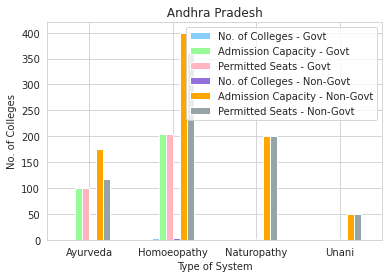

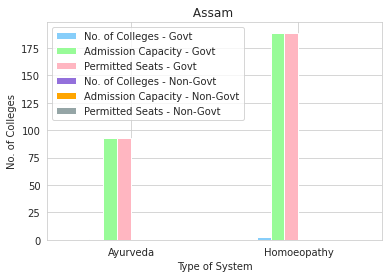

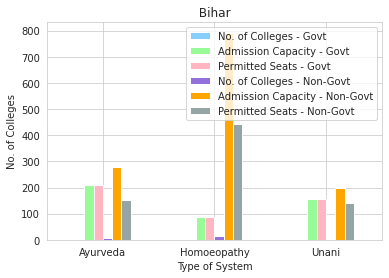

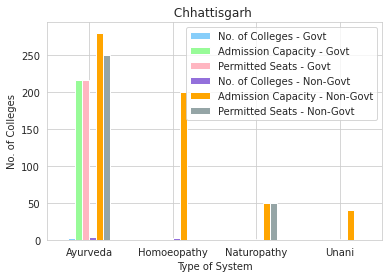

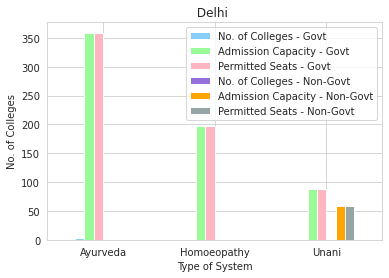

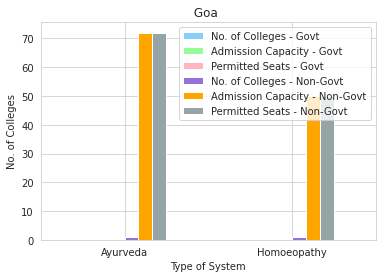

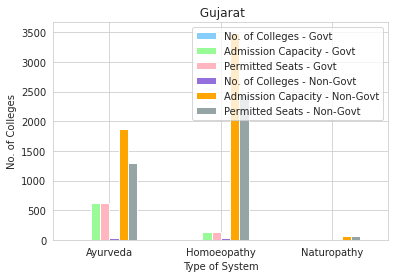

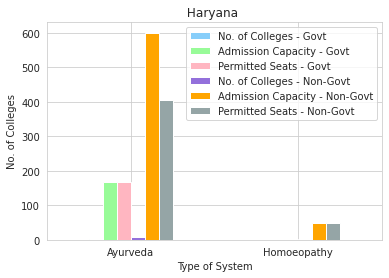

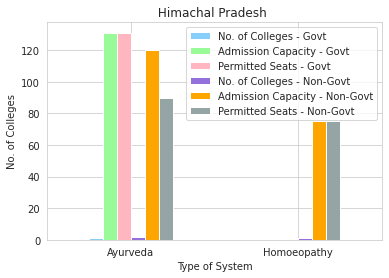

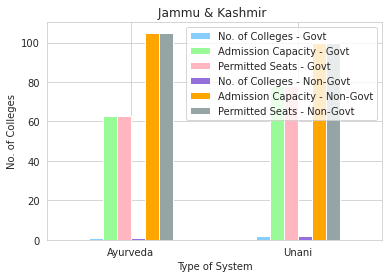

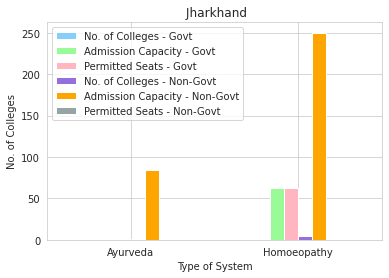

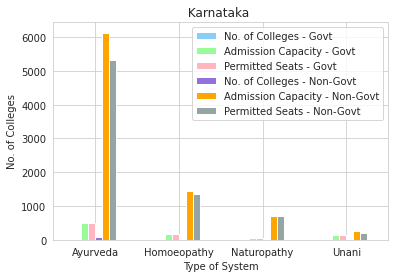

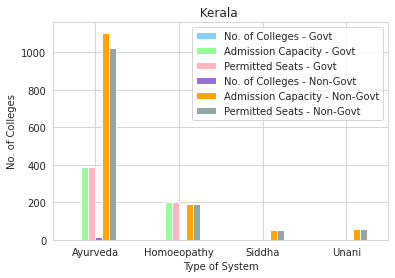

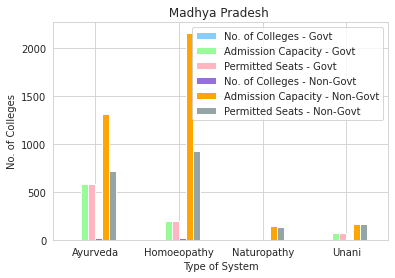

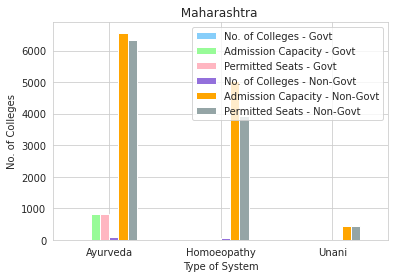

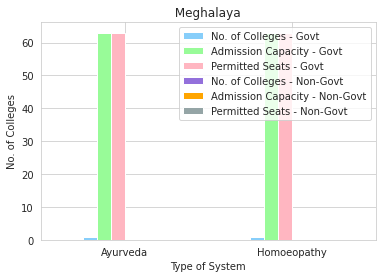

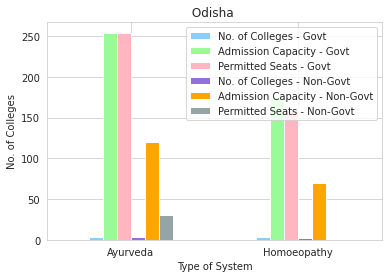

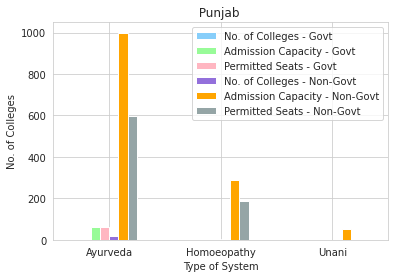

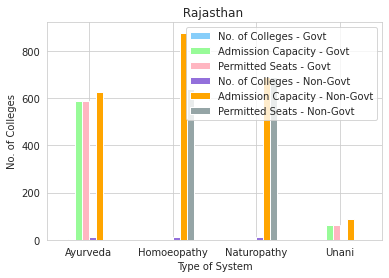

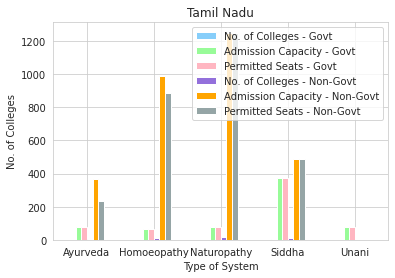

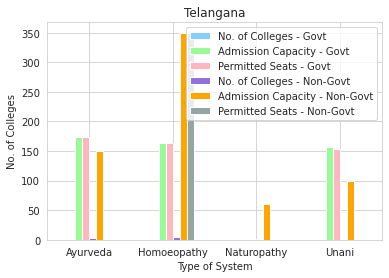

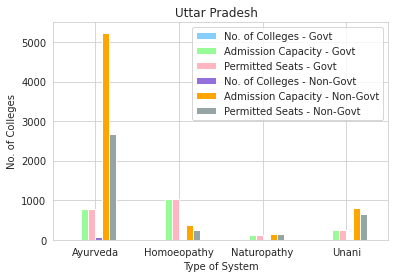

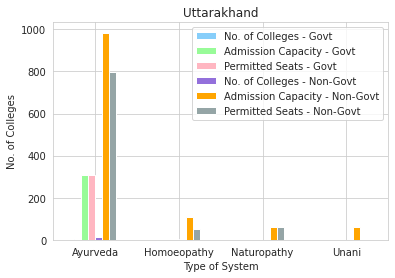

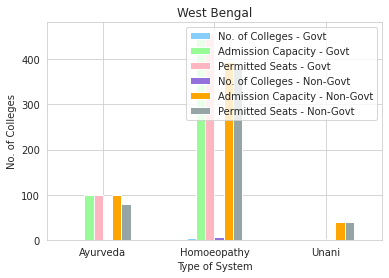

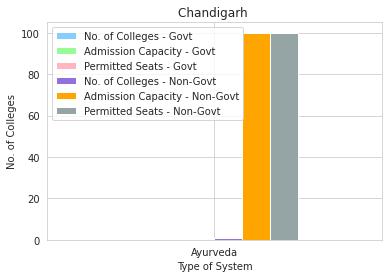

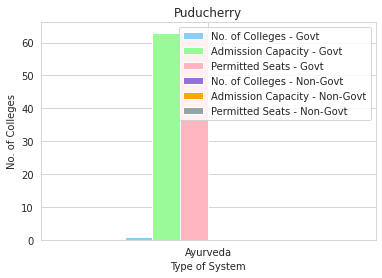

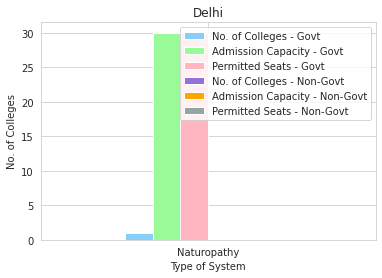

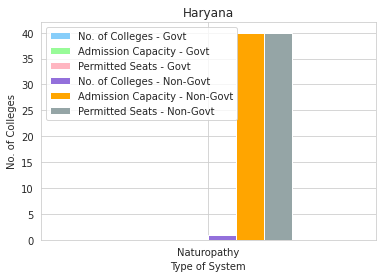

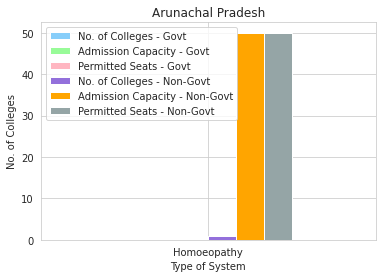

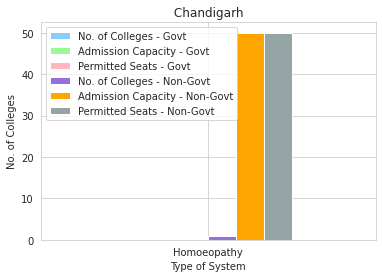

In [71]:

df = df1
# Define custom palette
custom_palette = ['#87CEFA','#98FB98','#FFB6C1','#9370DB', '#FFA500', '#95A5A6']

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)
# group the data by State or Union Territory and Type of System
grouped = df.groupby(['State or Union Territory', 'Type of System']).sum()

# loop through each State or Union Territory
for state in df['State or Union Territory'].unique():
    # get the data for the current state
    state_data = grouped.loc[state]
    
    # create a bar plot for the state data
    ax = state_data.plot(kind='bar', rot=0)
    ax.set_title(state)
    ax.set_xlabel('Type of System')
    ax.set_ylabel('No. of Colleges')
    plt.show()


#### for printing

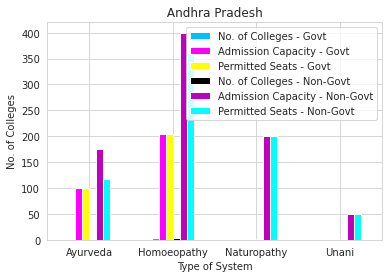

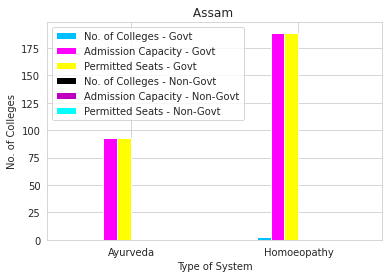

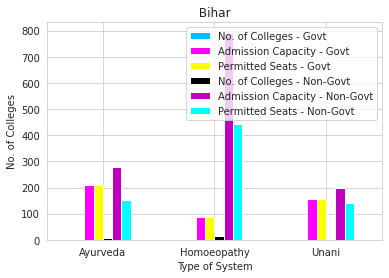

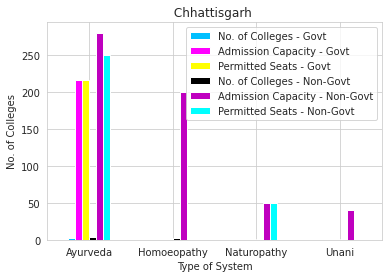

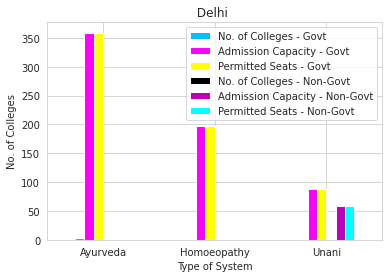

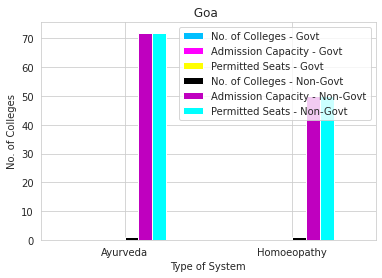

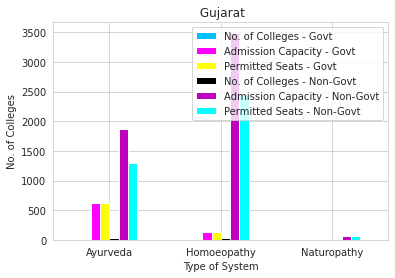

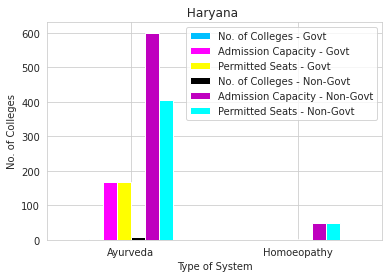

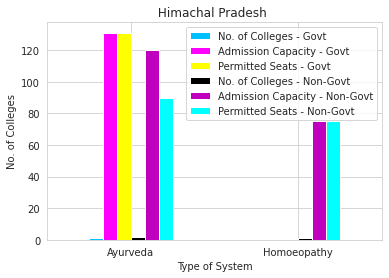

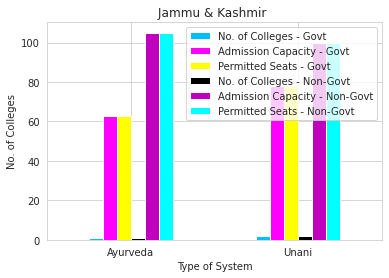

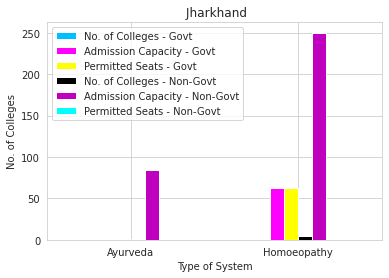

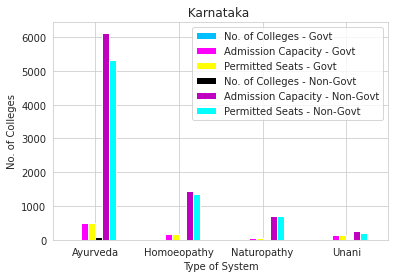

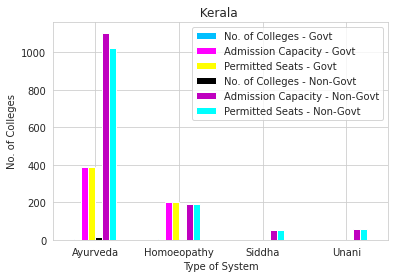

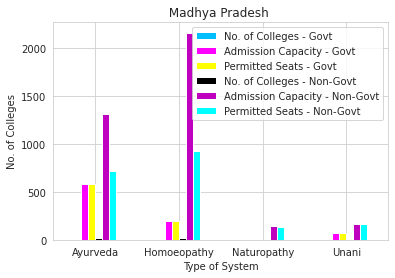

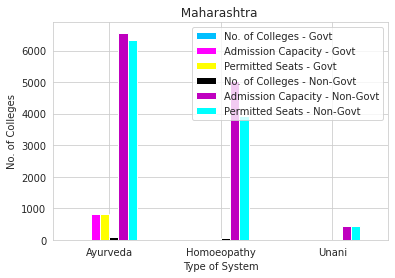

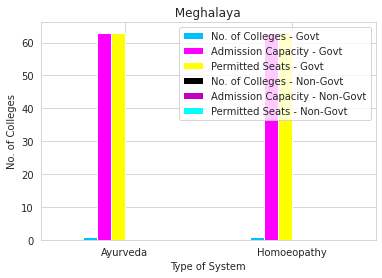

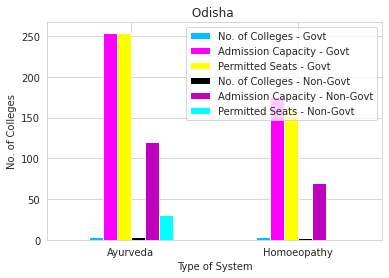

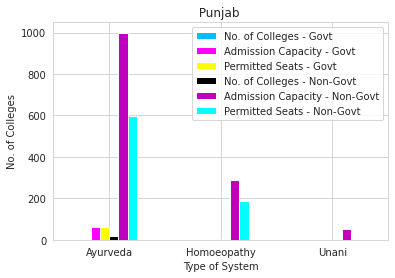

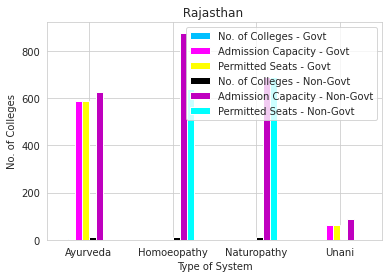

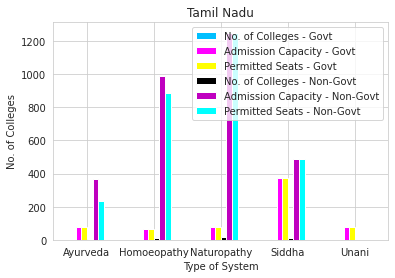

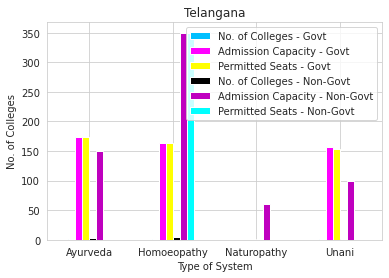

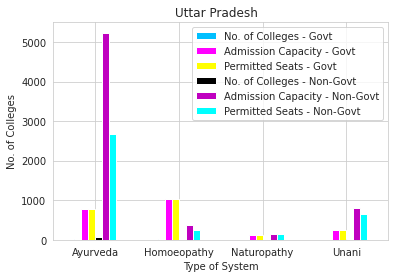

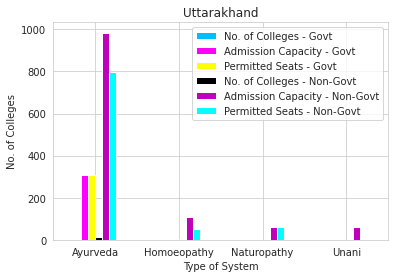

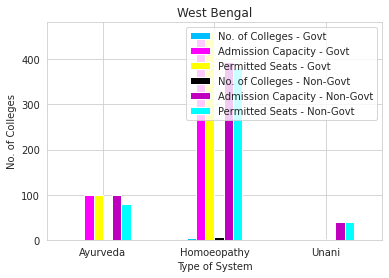

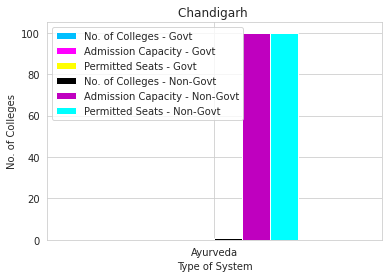

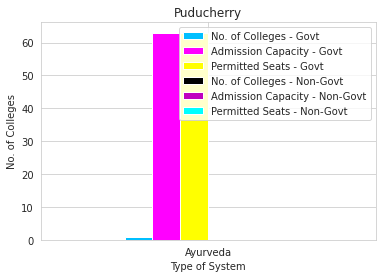

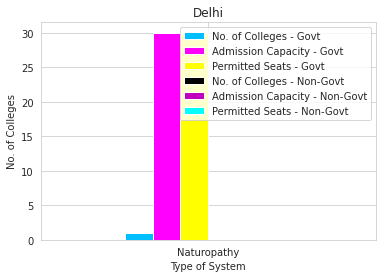

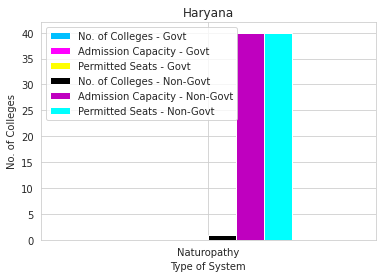

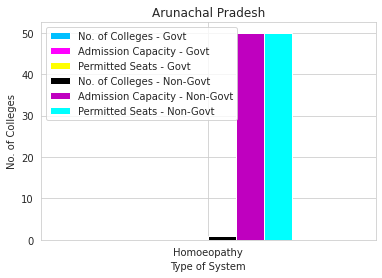

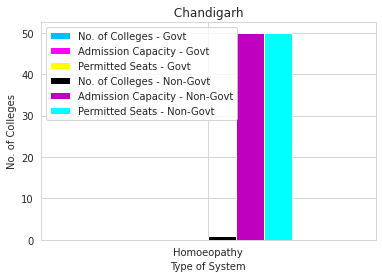

In [72]:

df = df1
# Define custom palette
custom_palette = ["#00BFFF", "#FF00FF", "#FFFF00", "#000000", "#BF00BF","#00FFFF"]

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)
# group the data by State or Union Territory and Type of System
grouped = df.groupby(['State or Union Territory', 'Type of System']).sum()

# loop through each State or Union Territory
for state in df['State or Union Territory'].unique():
    # get the data for the current state
    state_data = grouped.loc[state]
    
    # create a bar plot for the state data
    ax = state_data.plot(kind='bar', rot=0)
    ax.set_title(state)
    ax.set_xlabel('Type of System')
    ax.set_ylabel('No. of Colleges')
    plt.show()


#### using continuous scale

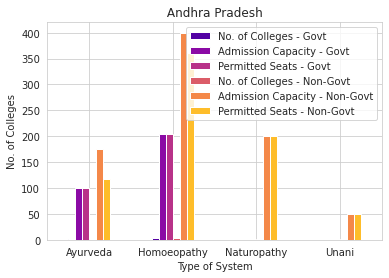

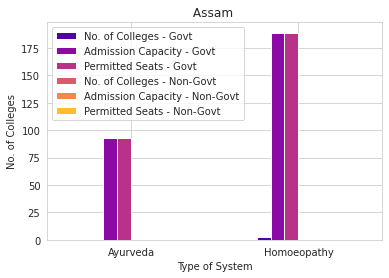

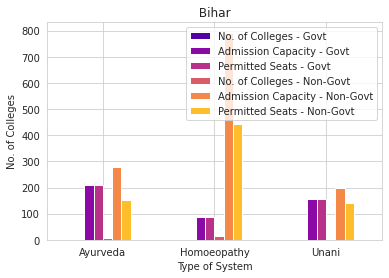

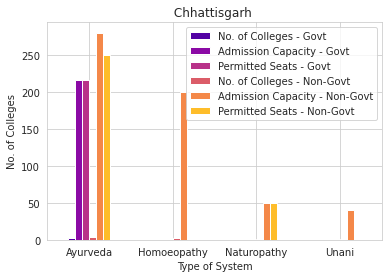

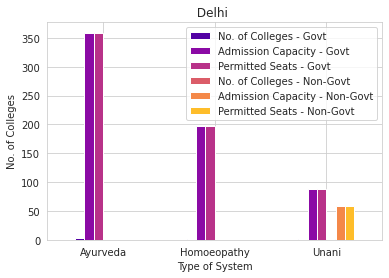

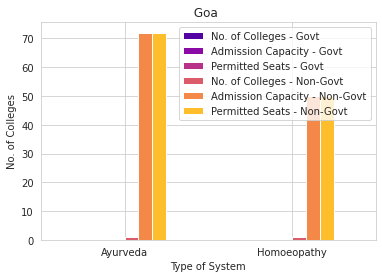

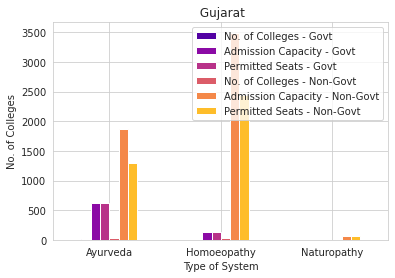

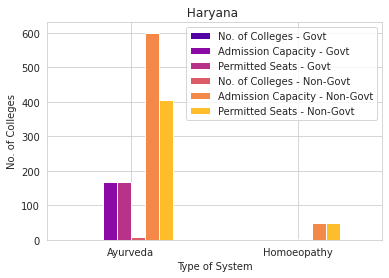

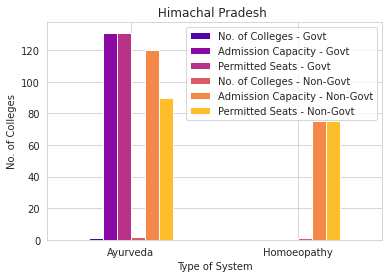

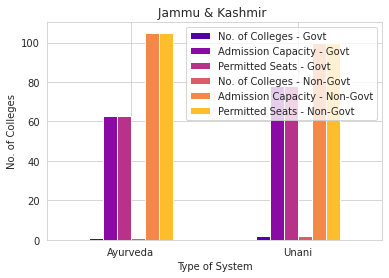

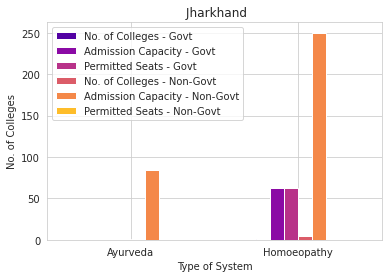

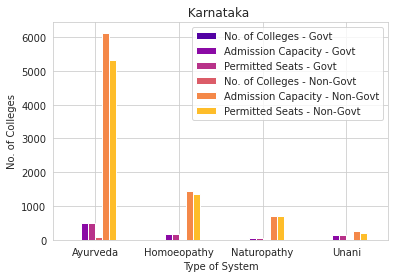

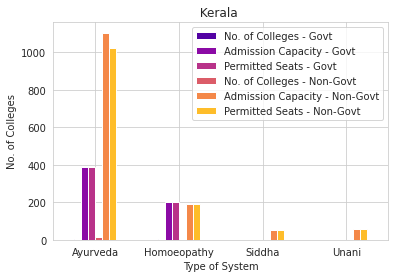

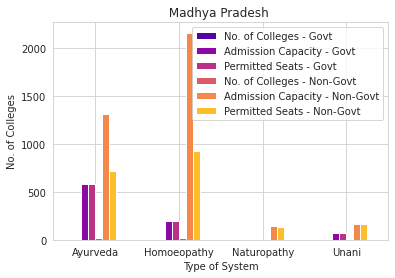

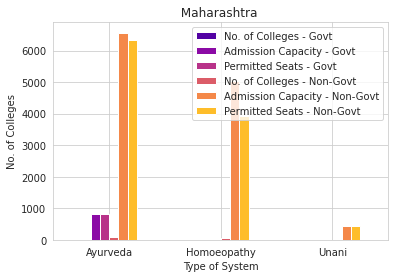

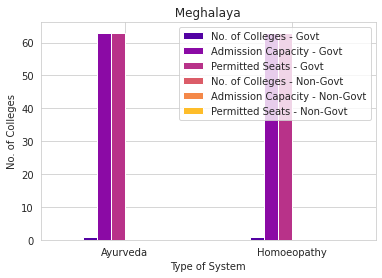

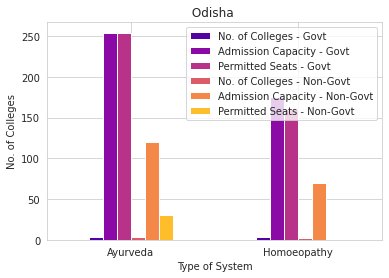

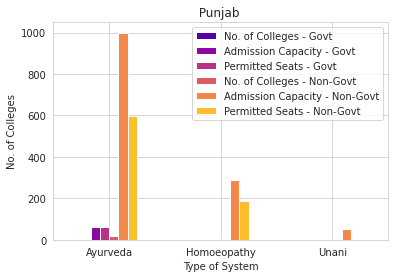

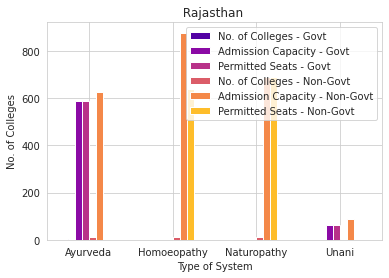

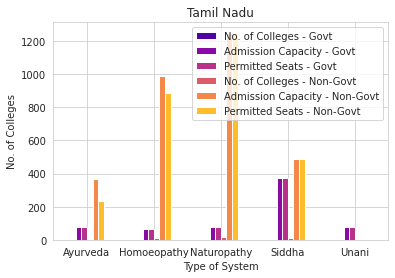

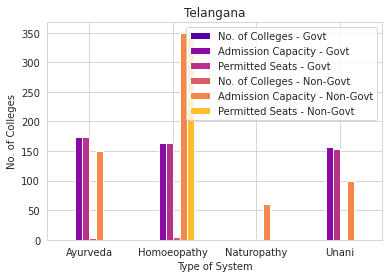

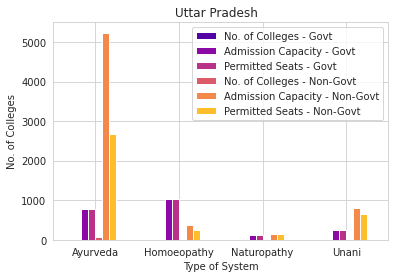

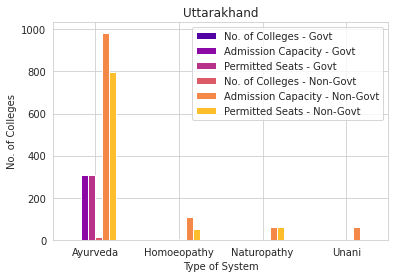

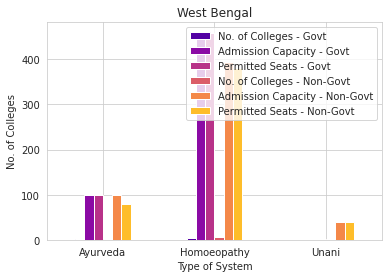

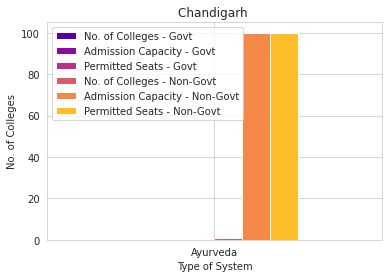

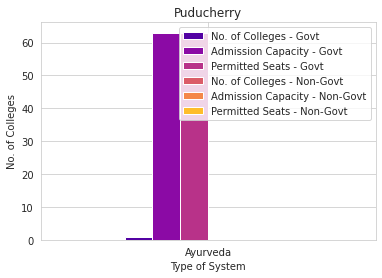

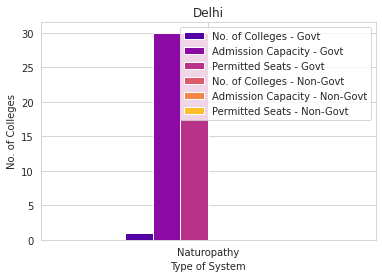

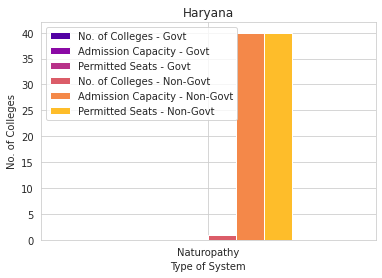

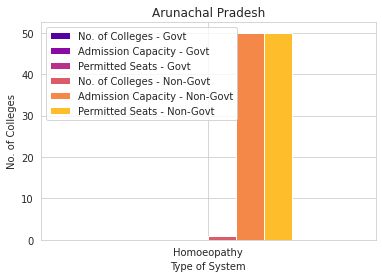

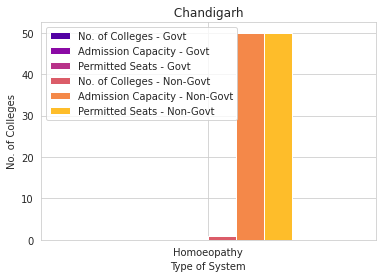

In [73]:

df = df1
# Define custom palette
custom_palette = 'plasma'

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)
# group the data by State or Union Territory and Type of System
grouped = df.groupby(['State or Union Territory', 'Type of System']).sum()

# loop through each State or Union Territory
for state in df['State or Union Territory'].unique():
    # get the data for the current state
    state_data = grouped.loc[state]
    
    # create a bar plot for the state data
    ax = state_data.plot(kind='bar', rot=0)
    ax.set_title(state)
    ax.set_xlabel('Type of System')
    ax.set_ylabel('No. of Colleges')
    plt.show()


#### using one color sequential

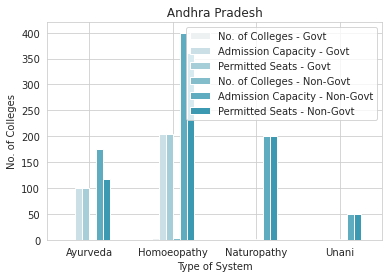

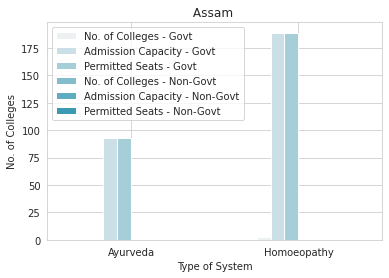

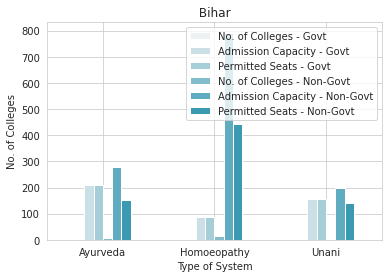

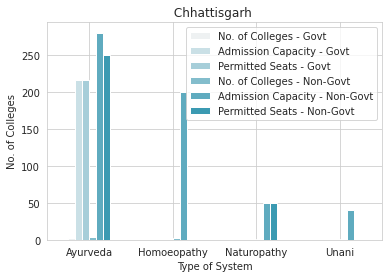

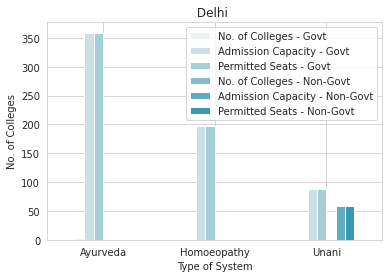

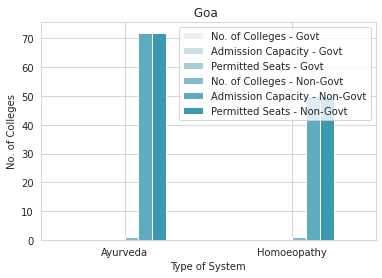

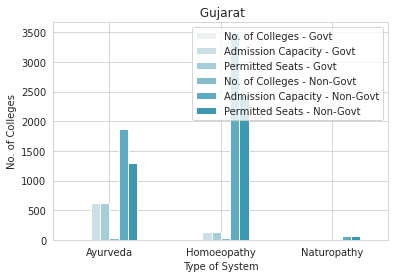

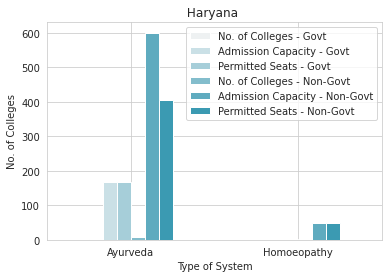

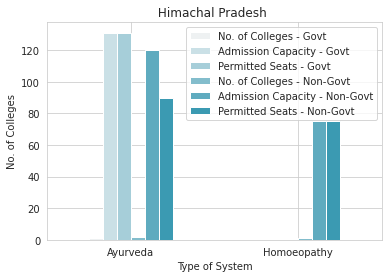

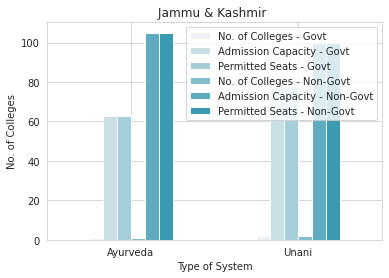

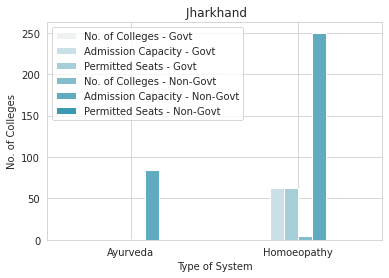

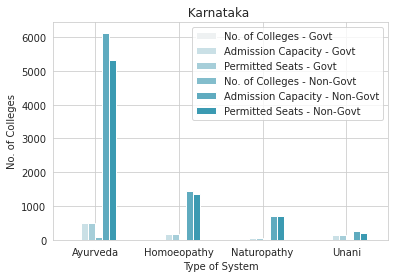

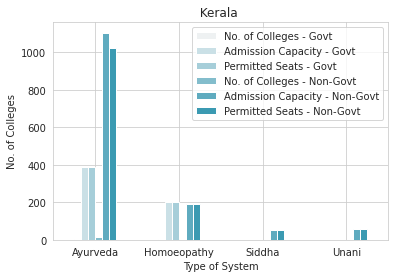

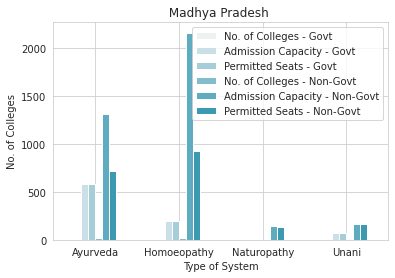

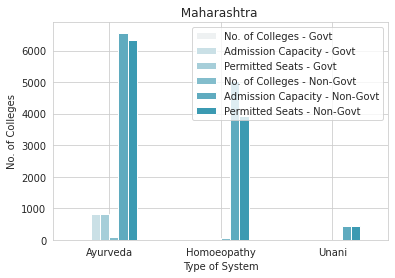

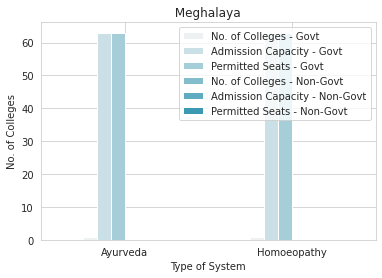

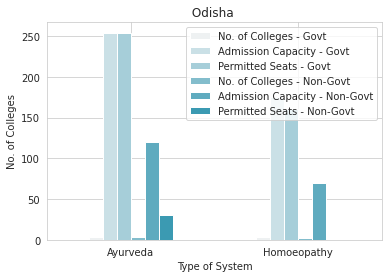

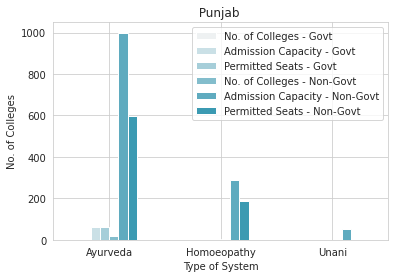

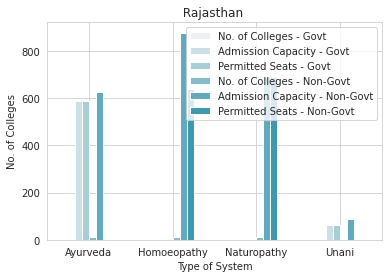

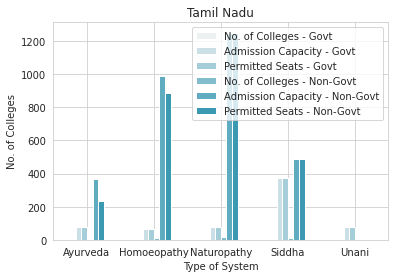

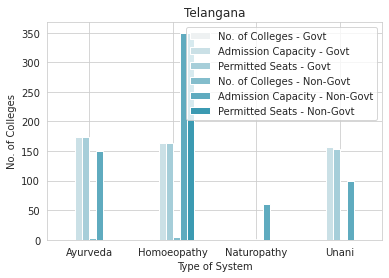

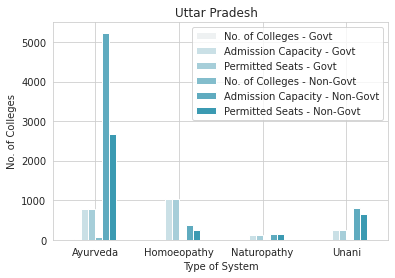

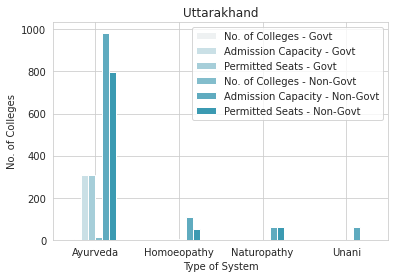

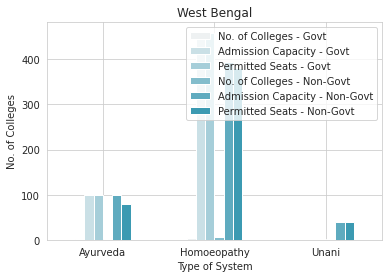

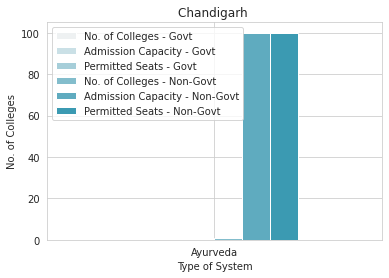

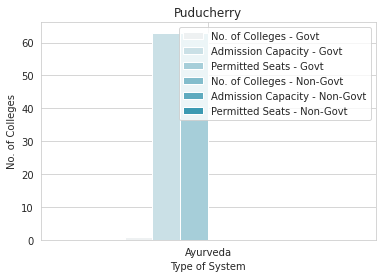

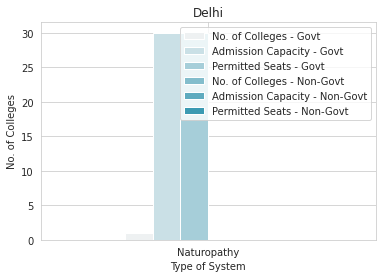

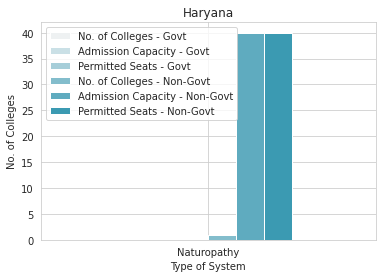

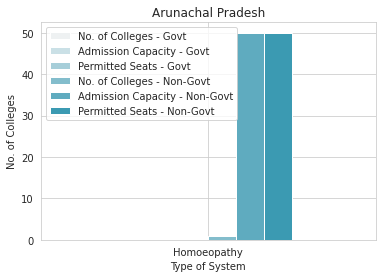

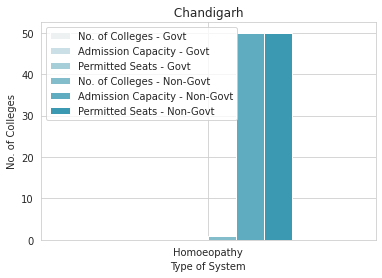

In [74]:

df = df1
# Define custom palette
custom_palette = sns.light_palette("#3B9AB2")

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)
# group the data by State or Union Territory and Type of System
grouped = df.groupby(['State or Union Territory', 'Type of System']).sum()

# loop through each State or Union Territory
for state in df['State or Union Territory'].unique():
    # get the data for the current state
    state_data = grouped.loc[state]
    
    # create a bar plot for the state data
    ax = state_data.plot(kind='bar', rot=0)
    ax.set_title(state)
    ax.set_xlabel('Type of System')
    ax.set_ylabel('No. of Colleges')
    plt.show()


#### using bipolar

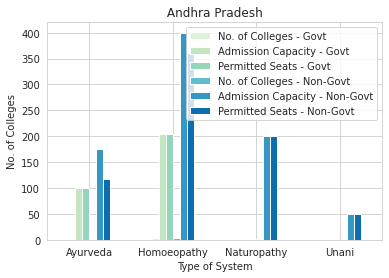

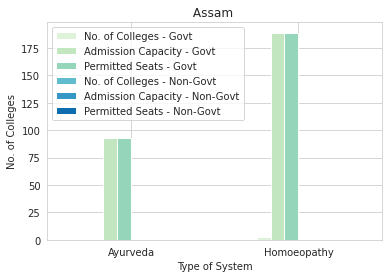

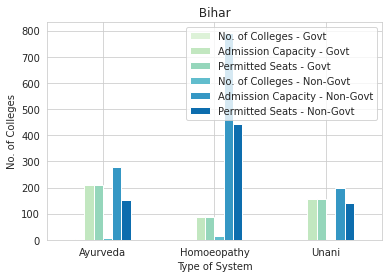

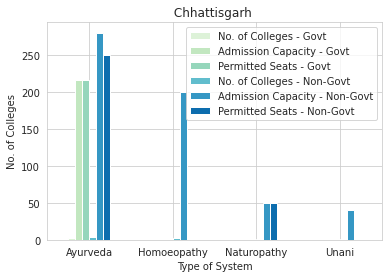

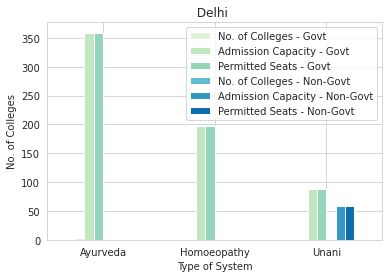

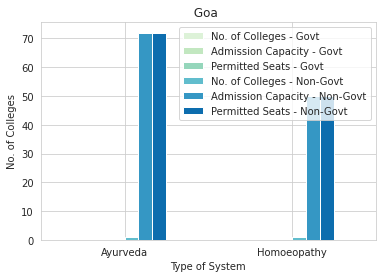

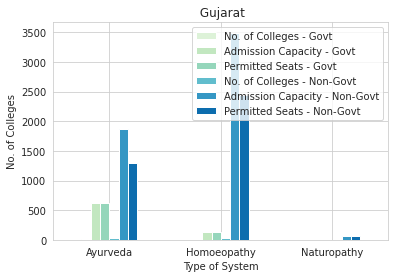

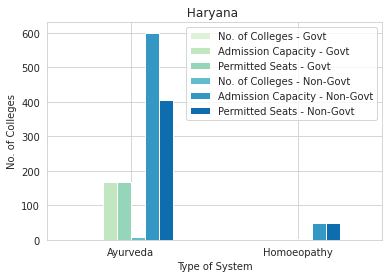

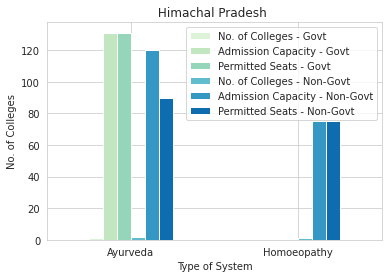

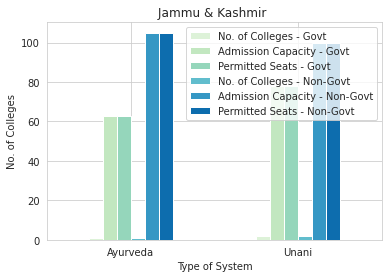

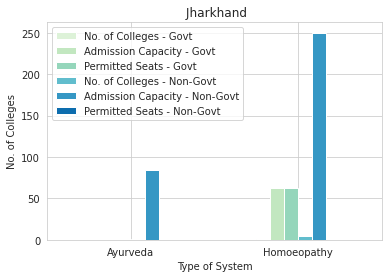

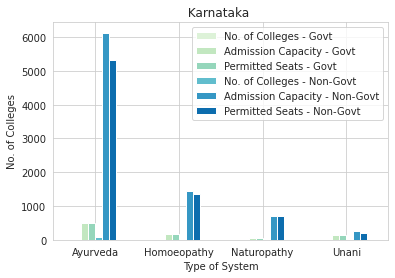

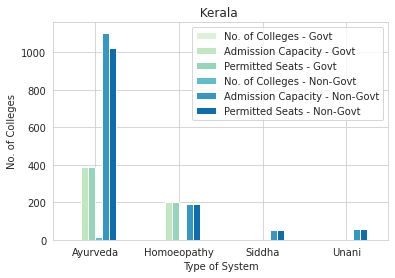

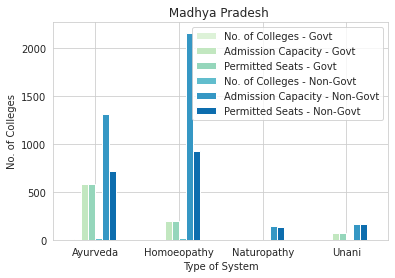

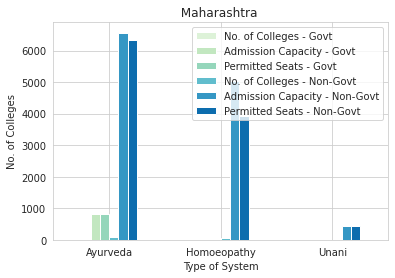

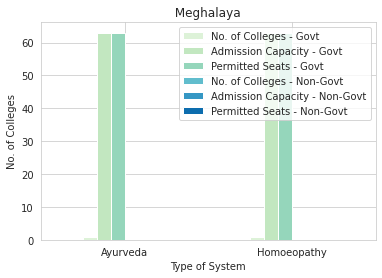

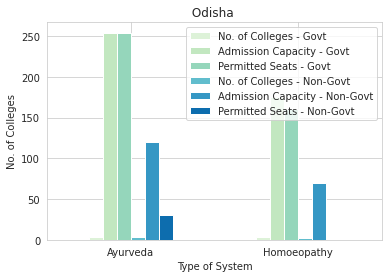

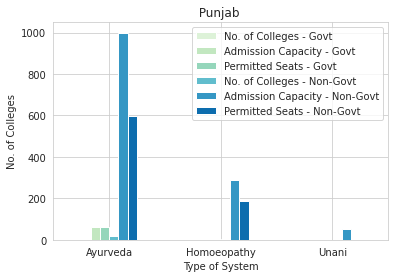

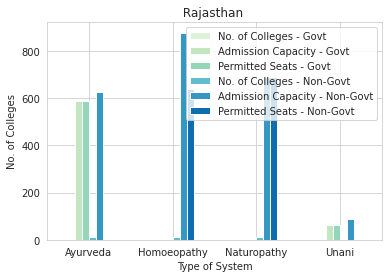

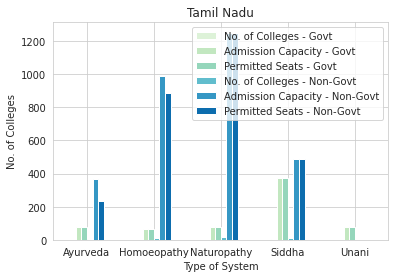

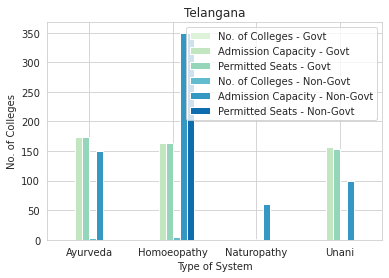

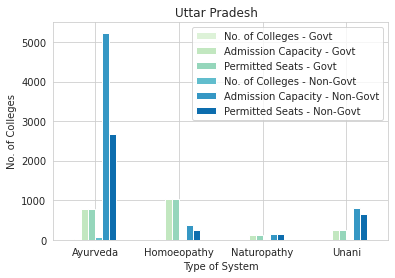

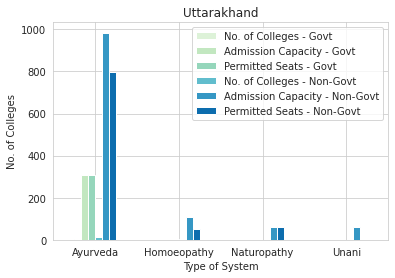

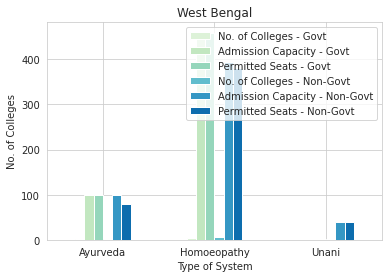

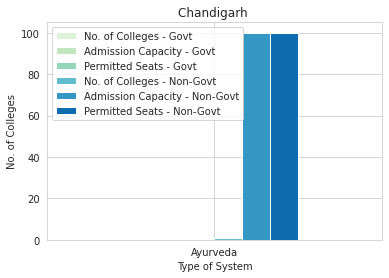

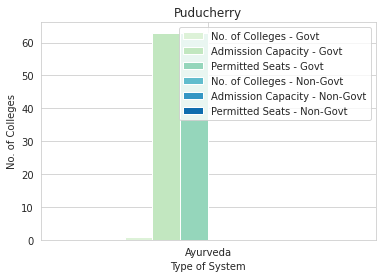

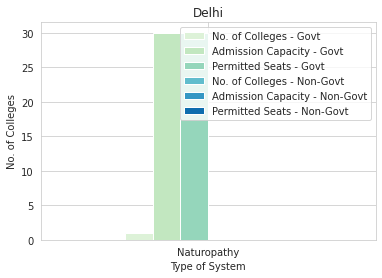

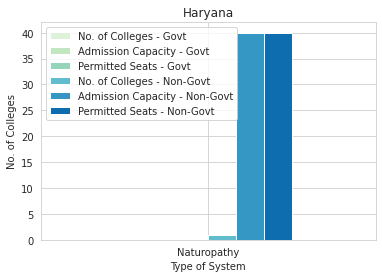

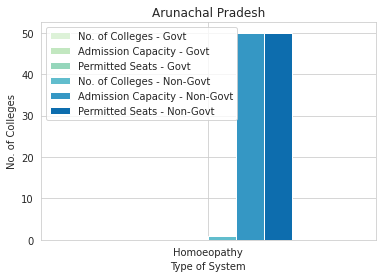

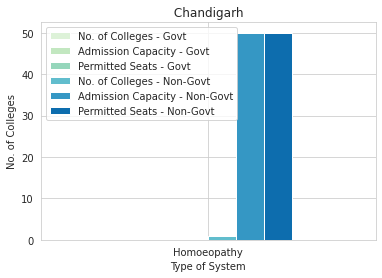

In [75]:

df = df1
# Define custom palette
custom_palette = sns.color_palette("GnBu", n_colors=6)

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette(custom_palette)
# group the data by State or Union Territory and Type of System
grouped = df.groupby(['State or Union Territory', 'Type of System']).sum()

# loop through each State or Union Territory
for state in df['State or Union Territory'].unique():
    # get the data for the current state
    state_data = grouped.loc[state]
    
    # create a bar plot for the state data
    ax = state_data.plot(kind='bar', rot=0)
    ax.set_title(state)
    ax.set_xlabel('Type of System')
    ax.set_ylabel('No. of Colleges')
    plt.show()


<h2>Note: considering Ayus cateogry is Ayurveda </h2>

In [76]:
data = df1
grouped_data = data.groupby(['State or Union Territory', 'Type of System'])['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'].sum().reset_index()
# filter for Ayus category
ayus_category = 'Ayurveda'

# filter data to include only Ayus colleges
ayus_data = grouped_data[grouped_data['Type of System'].str.contains(ayus_category, regex=False)]


<ipython-input-76-ed46193ae6e5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_data = data.groupby(['State or Union Territory', 'Type of System'])['No. of Colleges - Govt', 'No. of Colleges - Non-Govt'].sum().reset_index()


### for screen display

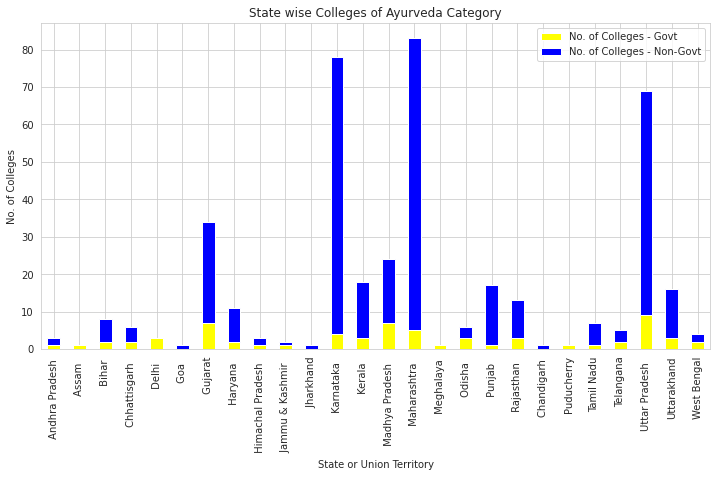

In [77]:
# define custom palette
custom_palette = ['#FFFF00','#0000FF']

# set palette
sns.set_palette(custom_palette)

# plot the data
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, figsize=(12, 6))

# set the labels and title
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category')
plt.show()



### for presentation

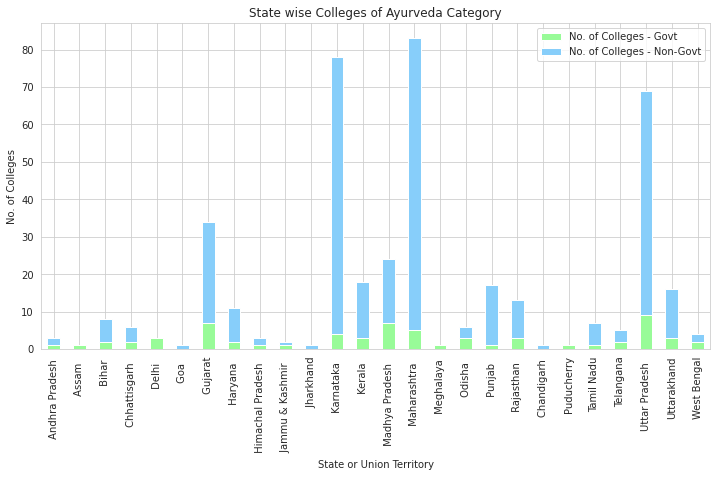

In [78]:
# define custom palette
custom_palette = ['#98FB98','#87CEFA']

# set palette
sns.set_palette(custom_palette)

# plot the data
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, figsize=(12, 6))

# set the labels and title
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category')
plt.show()



### for printing

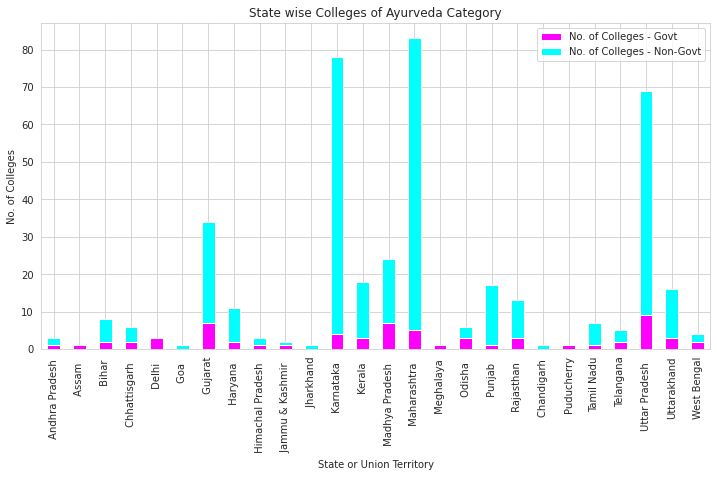

In [79]:
# define custom palette
custom_palette = ["#FF00FF", "#00FFFF"]

# set palette
sns.set_palette(custom_palette)

# plot the data
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, figsize=(12, 6))

# set the labels and title
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category')
plt.show()



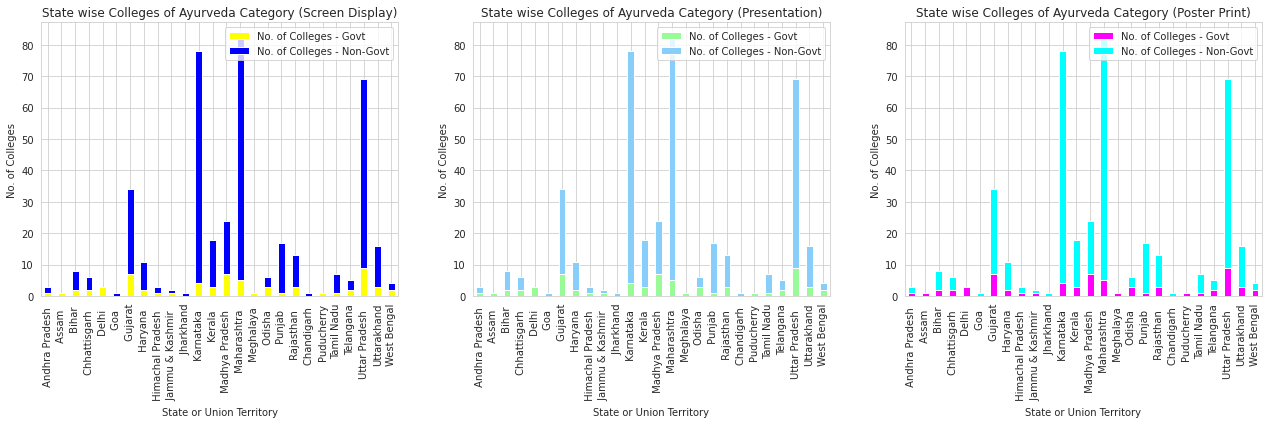

In [80]:
# define custom palettes for each subplot
screen_palette = ['#FFFF00','#0000FF']
presentation_palette = ['#98FB98','#87CEFA']
print_palette = ["#FF00FF", "#00FFFF"]

# set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

# plot each subplot
sns.set_palette(screen_palette)
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, ax=axes[0])
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category (Screen Display)')

sns.set_palette(presentation_palette)
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, ax=axes[1])
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category (Presentation)')

sns.set_palette(print_palette)
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, ax=axes[2])
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category (Poster Print)')

# display the plots
plt.tight_layout()
plt.show()


#### using continuous scale

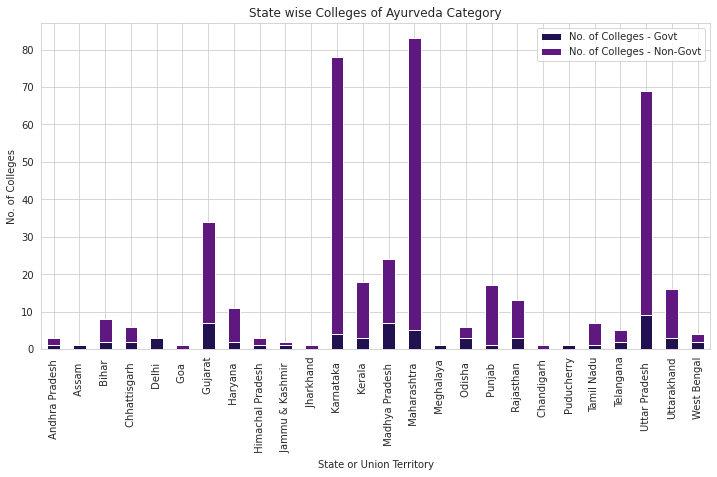

In [81]:
# define custom palette
custom_palette = 'magma'
sns.set_palette(custom_palette)
# plot the data
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, figsize=(12, 6))

# set the labels and title
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category')
plt.show()



#### using one color sequential

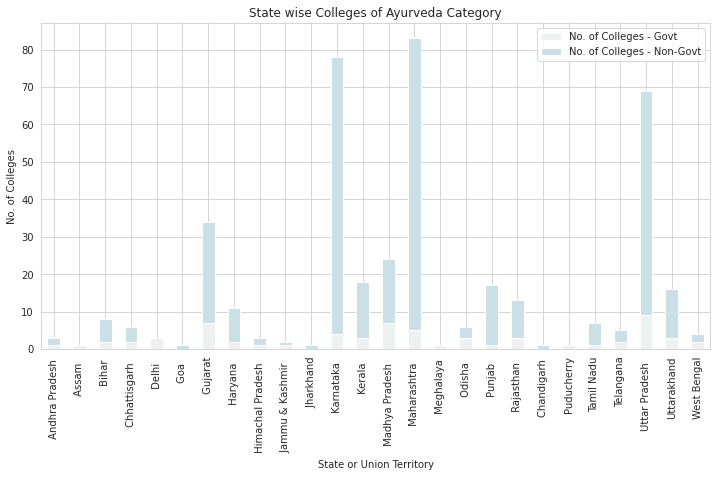

In [82]:
# define custom palette
custom_palette = sns.light_palette("#3B9AB2")
sns.set_palette(custom_palette)
# plot the data
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, figsize=(12, 6))

# set the labels and title
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category')
plt.show()



#### using bipolar scheme

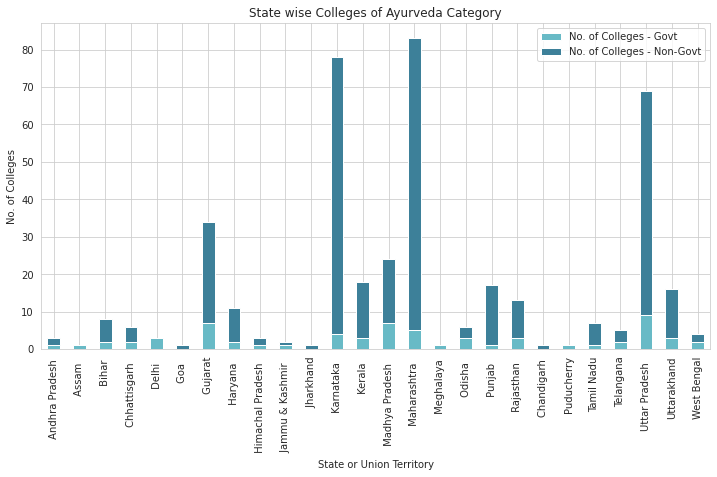

In [83]:
# define custom palette

custom_palette = sns.color_palette("GnBu_d", n_colors=2)
sns.set_palette(custom_palette)
# plot the data
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, figsize=(12, 6))

# set the labels and title
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category')
plt.show()

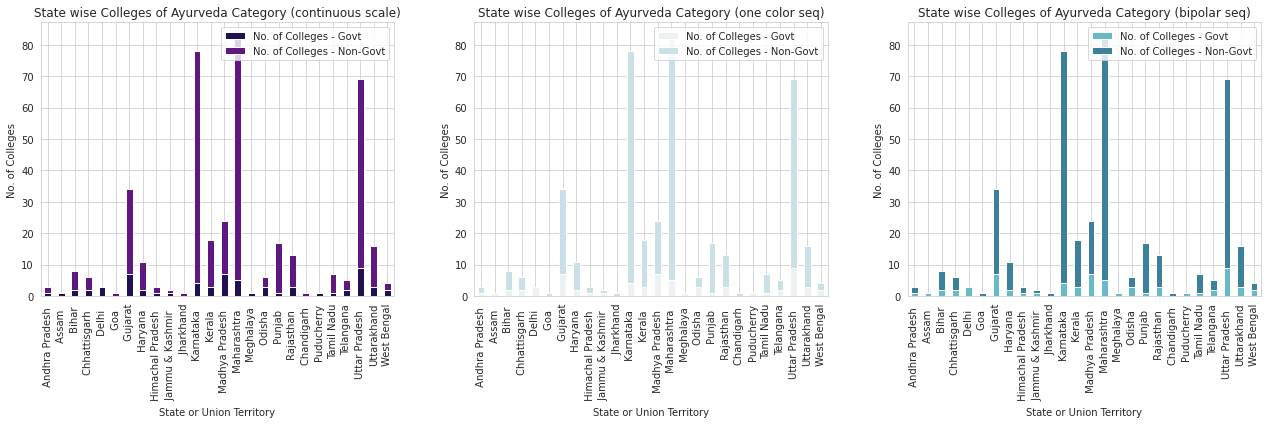

In [84]:
# define custom palettes for each subplot
screen_palette = 'magma'
presentation_palette = sns.light_palette("#3B9AB2")
print_palette = sns.color_palette("GnBu_d", n_colors=2)

# set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

# plot each subplot
sns.set_palette(screen_palette)
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, ax=axes[0])
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category (continuous scale)')

sns.set_palette(presentation_palette)
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, ax=axes[1])
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category (one color seq)')

sns.set_palette(print_palette)
ax = ayus_data.plot(x='State or Union Territory', kind='bar', stacked=True, ax=axes[2])
ax.set_xlabel('State or Union Territory')
ax.set_ylabel('No. of Colleges')
ax.set_title(f'State wise Colleges of {ayus_category} Category (bipolar seq)')

# display the plots
plt.tight_layout()
plt.show()


### Part 3

In [85]:
df1 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Data_visualization_labs/lab4/Road_Transport_BRS_2017-18_Annexure7_9c.csv')

In [86]:
df3.head()

Name of the States  National Highways  State Highways  District Roads  \
0     Andhra Pradesh              10207           15753           58083   
1  Arunachal Pradesh               2537           13500            8731   
2              Assam               3909            2530            6093   
3              Bihar               4877            4006           11145   
4       Chhattisgarh               3592            4176           11965   

   Rural Roads  Urban Roads  Project Roads  Total road Length  \
0       217892        34878           9447             346260   
1        20807           56           4924              50555   
2       303672         5603          21803             343609   
3       258800         9184           2559             290571   
4        54308        12765          15772             102578   

   Total Population  Road length per '000 pop  \
0             84581                      4.09   
1              1384                     36.54   
2             31206                     11.01   
3            104099                      2.79   
4             25545                      4.02   

   Road length per '000  Population - National Highways  \
0                                               0.12      
1                                               1.83      
2                                               0.13      
3                                               0.05      
4                                               0.14      

   Road length per '000  Population - State Highways  \
0                                               0.19   
1                                               9.76   
2                                               0.08   
3                                               0.04   
4                                               0.16   

   Road length per '000  Population - District Roads  \
0                                               0.69   
1                                               6.31   
2                                               0.20   
3                                               0.11   
4                                               0.47   

   Road length per '000  Population - Rural Roads  \
0                                            2.58   
1                                           15.04   
2                                            9.73   
3                                            2.49   
4                                            2.13   

   Road length per '000  Population - Urban roads  \
0                                            0.41   
1                                            0.04   
2                                            0.18   
3                                            0.09   
4                                            0.50   

   Road length per '000  Population - Project Roads  
0                                              0.11  
1                                              3.56  
2                                              0.70  
3                                              0.02  
4                                              0.62

In [87]:
df3.columns

Index(['Name of the States', 'National Highways', 'State Highways',
       'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads',
       'Total road Length', 'Total Population', 'Road length per '000 pop',
       'Road length per '000  Population - National Highways',
       'Road length per '000  Population - State Highways',
       'Road length per '000  Population - District Roads',
       'Road length per '000  Population - Rural Roads',
       'Road length per '000  Population - Urban roads',
       'Road length per '000  Population - Project Roads'],
      dtype='object')

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
df = df3

# filter relevant columns
cols_to_use = ['Name of the States', 'National Highways', 'State Highways', 'District Roads']
df = df[cols_to_use]

# set the state column as index
df = df.set_index('Name of the States')

#### for screen display

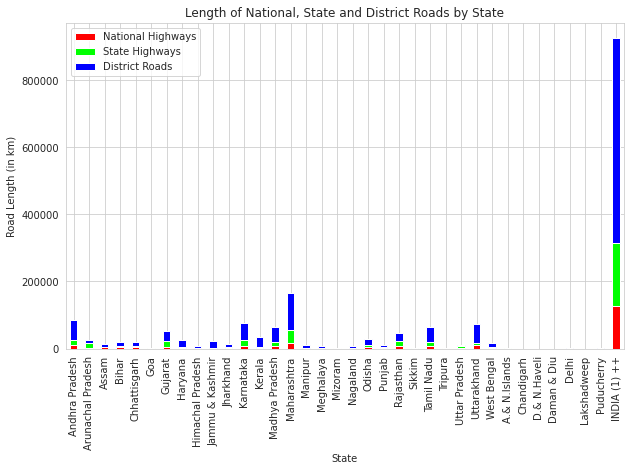

In [89]:
# define custom palette
custom_palette = ['#FF0000','#00FF00','#0000FF']

# set palette
sns.set_palette(custom_palette)

# plot a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10,6))

# set axis labels and title
plt.xlabel('State')
plt.ylabel('Road Length (in km)')
plt.title('Length of National, State and District Roads by State')

# display chart
plt.show()


#### for presentation

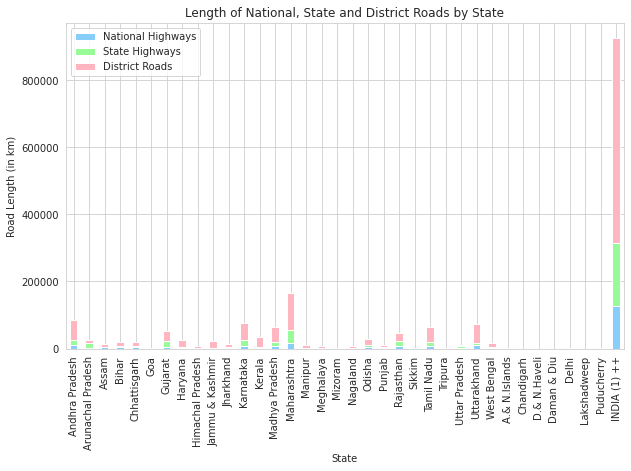

In [90]:
# define custom palette
custom_palette = ['#87CEFA','#98FB98','#FFB6C1']

# set palette
sns.set_palette(custom_palette)

# plot a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10,6))

# set axis labels and title
plt.xlabel('State')
plt.ylabel('Road Length (in km)')
plt.title('Length of National, State and District Roads by State')

# display chart
plt.show()


#### for printing

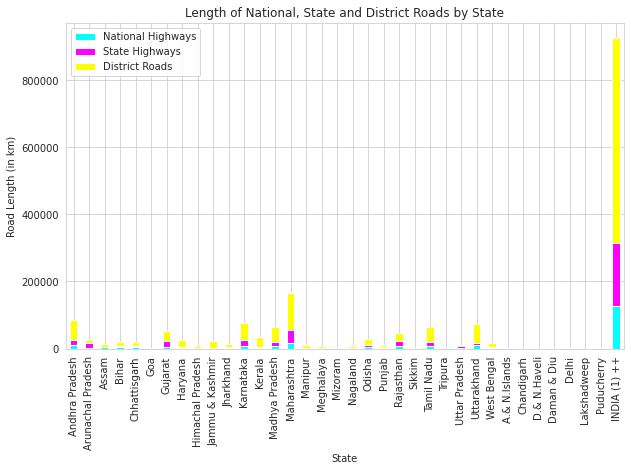

In [91]:
# define custom palette
custom_palette = ["#00FFFF", "#FF00FF", "#FFFF00"]

# set palette
sns.set_palette(custom_palette)

# plot a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10,6))

# set axis labels and title
plt.xlabel('State')
plt.ylabel('Road Length (in km)')
plt.title('Length of National, State and District Roads by State')

# display chart
plt.show()


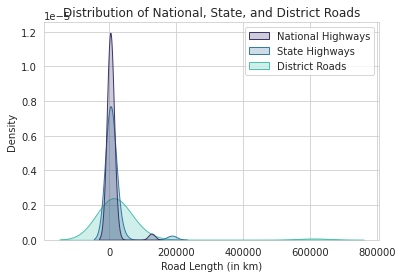

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
df = df3

# filter relevant columns
roads = df[['National Highways', 'State Highways', 'District Roads']]

# plot distribution of road lengths
sns.kdeplot(data=roads, palette="mako", shade=True)

# set title and axis labels
plt.title('Distribution of National, State, and District Roads')
plt.xlabel('Road Length (in km)')
plt.ylabel('Density')

# display chart
plt.show()


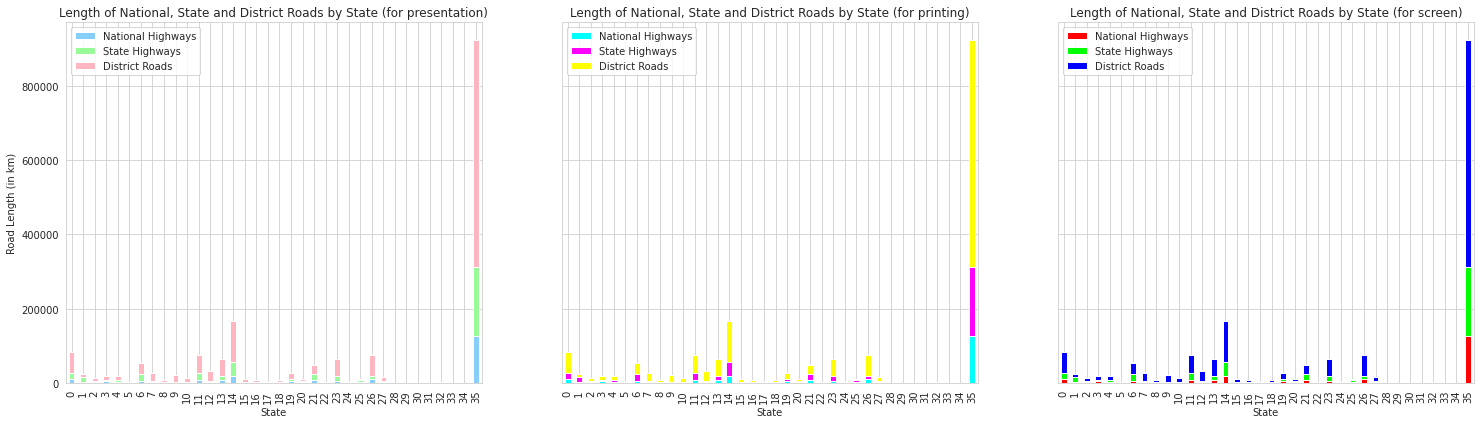

In [93]:
# Define custom palettes
df = roads
palette_present = ['#87CEFA', '#98FB98', '#FFB6C1']
palette_print = ["#00FFFF", "#FF00FF", "#FFFF00"]
palette_screen = ['#FF0000', '#00FF00', '#0000FF']

# Create subplots with shared y-axis
fig, axs = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Iterate through each subplot and plot the data with corresponding palette
for i, (ax, palette) in enumerate(zip(axs, [palette_present, palette_print, palette_screen])):
    df.plot(kind='bar', stacked=True, ax=ax, color=palette)
    ax.set_xlabel('State')
    ax.set_title(f'Length of National, State and District Roads by State (for {"presentation" if i==0 else "printing" if i==1 else "screen"})')

# Set the y-axis label only on the leftmost subplot
axs[0].set_ylabel('Road Length (in km)')

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the subplots
plt.show()


#### using continuous scale

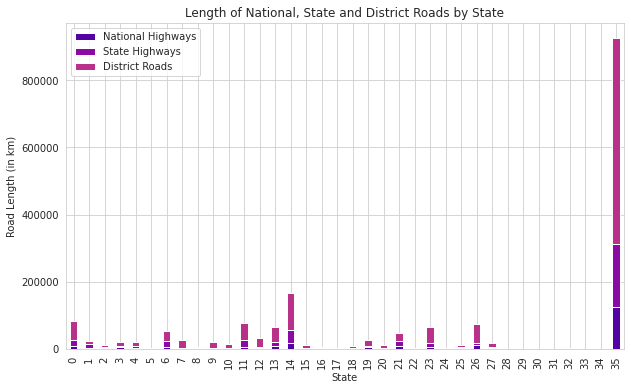

In [94]:
# define custom palette
df = roads
custom_palette = 'plasma'
# set palette
sns.set_palette(custom_palette)

# plot a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10,6))

# set axis labels and title
plt.xlabel('State')
plt.ylabel('Road Length (in km)')
plt.title('Length of National, State and District Roads by State')

# display chart
plt.show()


#### using one color sequential

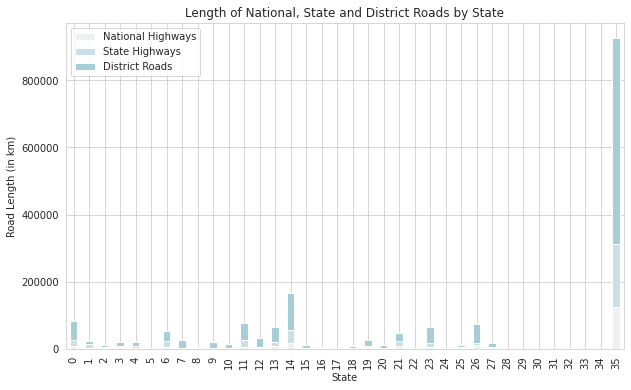

In [95]:
# define custom palette
df = roads
custom_palette = sns.light_palette("#3B9AB2")
sns.set_palette(custom_palette)
df = roads
# plot a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10,6))

# set axis labels and title
plt.xlabel('State')
plt.ylabel('Road Length (in km)')
plt.title('Length of National, State and District Roads by State')

# display chart
plt.show()


#### using bipolar

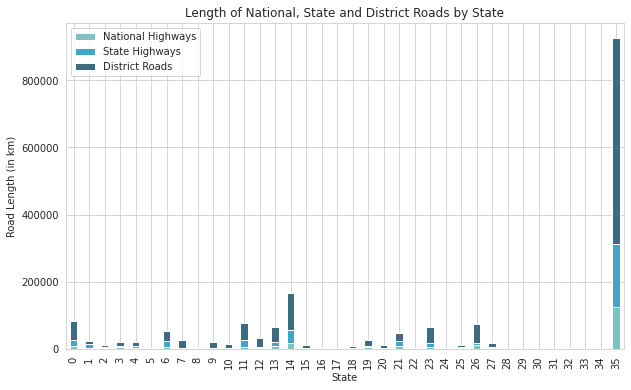

In [96]:
custom_palette = sns.color_palette("GnBu_d", n_colors=3)
sns.set_palette(custom_palette)
df = roads
# plot a stacked bar chart
df.plot(kind='bar', stacked=True, figsize=(10,6))

# set axis labels and title
plt.xlabel('State')
plt.ylabel('Road Length (in km)')
plt.title('Length of National, State and District Roads by State')

# display chart
plt.show()


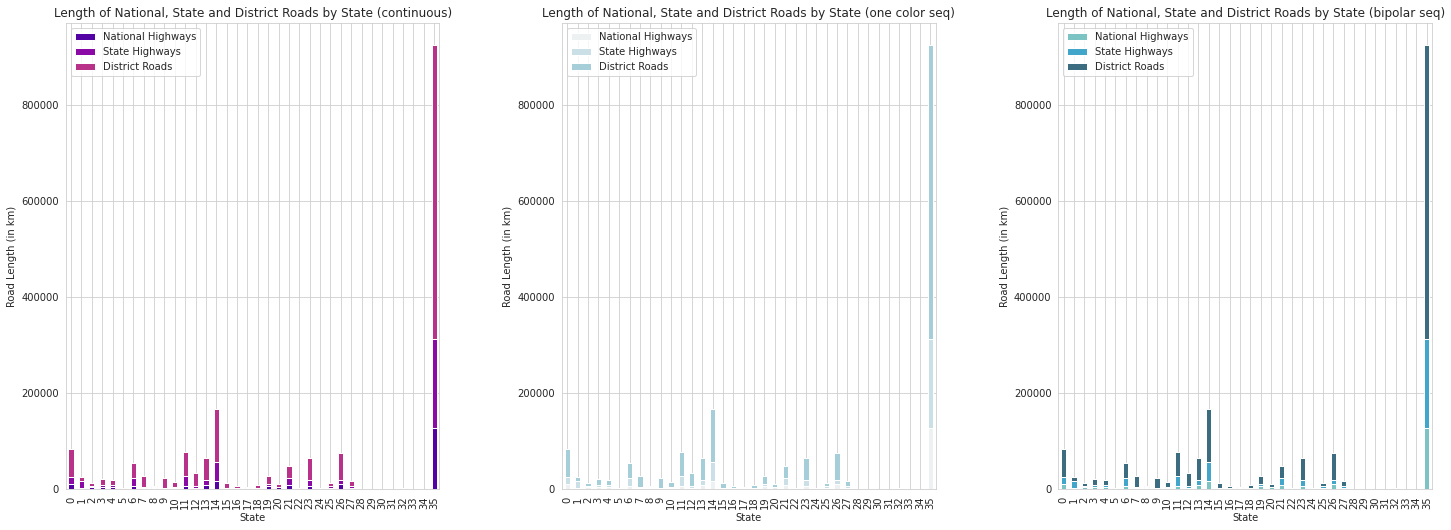

In [97]:
df = roads
# Define custom palettes
palette_continuous = 'plasma'
palette_onecolor = sns.light_palette("#3B9AB2")
palette_bipolar = sns.color_palette("GnBu_d", n_colors=3)

# create subplots
fig, axs = plt.subplots(1, 3, figsize=(21, 8))

# plot the charts with different palettes in each subplot
sns.set_palette(palette_continuous)
df.plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_xlabel('State')
axs[0].set_ylabel('Road Length (in km)')
axs[0].set_title('Length of National, State and District Roads by State (continuous)')

df.plot(kind='bar', stacked=True, ax=axs[1], color=palette_onecolor)
axs[1].set_xlabel('State')
axs[1].set_ylabel('Road Length (in km)')
axs[1].set_title('Length of National, State and District Roads by State (one color seq)')

df.plot(kind='bar', stacked=True, ax=axs[2], color=palette_bipolar)
axs[2].set_xlabel('State')
axs[2].set_ylabel('Road Length (in km)')
axs[2].set_title('Length of National, State and District Roads by State (bipolar seq)')

# adjust layout and spacing between subplots
fig.tight_layout(pad=3.0)

# display the subplots
plt.show()

<center> <h2> --------------------------------------- THANK YOU !! --------------------------------------- </h2></center>